# **Predicting Arrests Following Terry Stops: Analyzing Factors Influencing Police Decision-Making**

## **Introduction**

In the realm of law enforcement, Terry Stops have been a subject of ongoing debate and scrutiny since their inception following the 1968 Supreme Court case Terry v. Ohio. These brief detentions, based on reasonable suspicion rather than probable cause, have become a common policing practice but have also raised concerns about potential biases and the fine line between public safety and individual rights. This project aims to delve into the complex dynamics of Terry Stops by leveraging data analytics and machine learning techniques. Our goal is to develop a predictive model that can determine the likelihood of an arrest following a Terry Stop, based on various factors such as the presence of weapons, time of day, and potentially sensitive demographic information like race and gender.  

By analyzing this data, we seek to uncover patterns and insights that could help law enforcement agencies refine their practices, address potential biases, and strike a balance between effective policing and fair treatment of all individuals. This analysis is particularly timely given the current national discourse on police reform and racial equity in the justice system. Our approach will involve careful consideration of ethical implications, transparent methodology, and a commitment to presenting findings in a way that contributes constructively to the ongoing dialogue about fair and effective law enforcement. Through this project, we aim to provide data-driven insights that can inform policy decisions, enhance police training, and ultimately contribute to building trust between law enforcement and the communities they serve. As we embark on this analysis, we recognize the sensitivity of the subject matter and the potential impact of our findings. Our objective is not to pass judgment but to illuminate patterns and trends that can lead to more informed, equitable, and effective policing practices in the context of Terry Stops.  

## **Business Understanding**

### Problem Statement

Law enforcement agencies are facing scrutiny over their stop-and-frisk practices, particularly regarding potential biases in arrest decisions. There's a need to understand the factors that influence whether an arrest is made following a Terry Stop to ensure fair and effective policing. This project aims to use data analysis and machine learning to shed light on the factors influencing arrest decisions during Terry Stops, potentially uncovering patterns that could help improve police practices and address concerns about bias in law enforcement.

### Objectives

- Develop a machine learning model to predict whether an arrest will be made after a Terry Stop.  
- Identify key factors that contribute to arrest decisions.  
- Analyze if and how demographic factors (race, gender) correlate with arrest outcomes.  
- Provide insights to help law enforcement agencies improve their decision-making processes and address potential biases.  

### Stakeholders

- Law enforcement agencies
- Police officers
- Policy makers
- Community leaders and civil rights organizations
- General public

### Data Sources

Dataset was obtained from Seattle Government which can be accessed using this [link](https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8/data_preview)  
Terry Stops dataset containing information on:  

- Presence of weapons  
- Time of day of the call  
- Demographic information (race, gender) of subjects and officers  
- Arrest outcomes  

### Ethical Considerations

- Handling sensitive demographic data responsibly  
- Addressing potential biases in the dataset and model  
- Ensuring transparency in methodology and findings  
- Considering the broader societal implications of the analysis  

### Success Criteria 

- Develop a classifier with high accuracy in predicting arrests  
- Provide actionable insights for improving police practices  
- Contribute to the ongoing dialogue about fair policing and potential biases in law enforcement  

### Methodology

1. **Data Collection and Inspection**: Gathering the necessary data from the provided dataset.
2. **Data Cleaning and Preparation**: Cleaning the data to handle missing values, outliers, and incorrect data types.
3. **Exploratory Data Analysis (EDA)**: Analyzing the data to find patterns, relationships, and insights.
4. **Data Preprocessing**: This includes `Feature Selection`, `Target Variable Encoding`, `Time Conversion` and `Categorical Encoding`.
5. **Data Splitting**: Splitting data into Training and Testing sets using the **70/20** ratio.
6. **Model Selection and Training**: Come up with model choice and model training.
7. **Model Evaluation**: Check on Accuracy and Classification Report
8. **Discussion and Next Steps**: Model Performance Analaysis and Future work

## **Data Understanding**

### Importing libraries

In [2]:
# import necessary libraries and functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, \
    cross_val_score, StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, \
    ConfusionMatrixDisplay, classification_report, f1_score, recall_score, \
    PrecisionRecallDisplay, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn import tree
from sklearn.pipeline import Pipeline


In [3471]:
# Load the dataset
df = pd.read_csv("./Data/Terry_Stops_20240823.csv")
# Viewing the first 5 rows
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,18 - 25,-1,20170000017766,230380,Offense Report,NaN,6728,1973,M,Two or More Races,...,08:03:00.0000000,ASLT - PERSON SHOT OR SHOT AT,--DRIVE BY SHOOTING - NO INJURIES,911,SOUTH PCT 1ST W - R/S RELIEF,N,Y,South,S,S2
1,-,-1,20190000273690,8755198750,Field Contact,-,7528,1969,M,White,...,06:38:41.0000000,"OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...","--WEAPON,PERSON WITH - OTHER WEAPON",911,NORTH PCT OPS - CPT,N,Y,North,U,U3
2,36 - 45,7735709716,20200000186847,13469755649,Field Contact,-,6414,1964,M,Asian,...,01:27:52.0000000,OBS - DOWN - CHECK FOR PERSON DOWN,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - NORA (JOHN) - PLATOON 1,N,N,North,N,N2
3,46 - 55,-1,20170000149189,460834,Arrest,NaN,5491,1967,M,Black or African American,...,09:53:00.0000000,ASLT - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,NORTH PCT 1ST W - LINCOLN (UNION) - PLATOON 1,N,Y,North,L,L3
4,46 - 55,-1,20160000001969,153868,Field Contact,NaN,6899,1977,M,White,...,21:57:00.0000000,-,-,-,NORTH PCT 3RD W - LINCOLN - PLATOON 1,N,N,-,-,-


Loading the Data and viewing the first 5 rows of the Dataset

### Data Inspection

In [3472]:
# The shape of the dataset
df.shape

(60984, 23)

The dataset contains 60,984 records and 23 columns.Below is a list of the columns in the DataFrame

In [3473]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

There is detailed description of each of the 23 columns of the DataFrame in `description.txt` file in the `Data` folder

In [3474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60984 entries, 0 to 60983
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         60984 non-null  object
 1   Subject ID                60984 non-null  int64 
 2   GO / SC Num               60984 non-null  int64 
 3   Terry Stop ID             60984 non-null  int64 
 4   Stop Resolution           60984 non-null  object
 5   Weapon Type               28419 non-null  object
 6   Officer ID                60984 non-null  object
 7   Officer YOB               60984 non-null  int64 
 8   Officer Gender            60984 non-null  object
 9   Officer Race              60984 non-null  object
 10  Subject Perceived Race    60984 non-null  object
 11  Subject Perceived Gender  60984 non-null  object
 12  Reported Date             60984 non-null  object
 13  Reported Time             60984 non-null  object
 14  Initial Call Type     

From the above output, we can notice that majority of the column's DataTypes are `objects`(**19**) whereas only **4** are `integers` 

In [3475]:
df.isna().any()

Subject Age Group           False
Subject ID                  False
GO / SC Num                 False
Terry Stop ID               False
Stop Resolution             False
Weapon Type                  True
Officer ID                  False
Officer YOB                 False
Officer Gender              False
Officer Race                False
Subject Perceived Race      False
Subject Perceived Gender    False
Reported Date               False
Reported Time               False
Initial Call Type           False
Final Call Type             False
Call Type                   False
Officer Squad                True
Arrest Flag                 False
Frisk Flag                  False
Precinct                    False
Sector                      False
Beat                        False
dtype: bool

We can notice from the output that only Weapon Type and Officer Squad have the Null values. 

From the Data Frame, We can still notice there are also other columns with placeholder ("-" values). 

In [3476]:
# Calculate the count of '-' values per column
dash_counts = (df == "-").sum()

# Calculate the percentage
total_rows = len(df)
dash_percentages = (dash_counts / total_rows) * 100

# Create a new DataFrame with the results
summary_df = pd.DataFrame({
    'Count': dash_counts,
    'Percentage': dash_percentages
})

# Sort the DataFrame by Count in descending order
summary_df = summary_df.sort_values('Count', ascending=False)

# Display the results
print(summary_df[summary_df['Count'] > 0])

                          Count  Percentage
Weapon Type               24549   40.254821
Initial Call Type         13473   22.092680
Call Type                 13473   22.092680
Final Call Type           13473   22.092680
Sector                    10770   17.660370
Beat                      10764   17.650531
Precinct                  10619   17.412764
Subject Age Group          2200    3.607504
Subject Perceived Race     1816    2.977830
Frisk Flag                  478    0.783812
Subject Perceived Gender    243    0.398465
Officer ID                   24    0.039355


From the above output, it shows that `Weapon Type` is leading in number of missing data with placeholder ("-" value) by 40.25 % followed closely by call-related columns (`Initial Call Type`, `Call Type`, `Final Call Type`) at 22.09 % each and location-related columns (`Sector`, `Beat`, `Precinct`) at 17.66 %, 17.65 % and 17.41% respectively. The rest of the columns have very few missing data

We are first going to convert them into NaN and re-check sum of null values in our dataset. This is an indication that the records were Missing or Undefined during the data entries

In [3477]:
# Replace '-' values with NaN
df.replace('-', np.NaN, inplace=True)

# Check if there is any null values in the Dataset
df.isna().sum()

Subject Age Group            2200
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 57114
Officer ID                     24
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race       1816
Subject Perceived Gender      243
Reported Date                   0
Reported Time                   0
Initial Call Type           13473
Final Call Type             13473
Call Type                   13473
Officer Squad                 561
Arrest Flag                     0
Frisk Flag                    478
Precinct                    10619
Sector                      10770
Beat                        10764
dtype: int64

In [3478]:
# Checking for missing values and their percentages
missing_values = df.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

print(missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False))

                          Missing Values  Percentage
Weapon Type                        57114   93.654073
Initial Call Type                  13473   22.092680
Final Call Type                    13473   22.092680
Call Type                          13473   22.092680
Sector                             10770   17.660370
Beat                               10764   17.650531
Precinct                           10619   17.412764
Subject Age Group                   2200    3.607504
Subject Perceived Race              1816    2.977830
Officer Squad                        561    0.919913
Frisk Flag                           478    0.783812
Subject Perceived Gender             243    0.398465
Officer ID                            24    0.039355


We identified the columns with missing values and their respective percentages to understand the extent of missing data in our dataset. The results are as follows:  
| Column                   | Missing Values |  Percentage  | 
|--------------------------|----------------|--------------|
| Weapon Type              |   57114        | 93.654073 %  |
| Initial Call Type        |   13473        | 22.092680 %  |
| Final Call Type          |   13473        | 22.092680 %  |
| Call Type                |   13473        | 22.092680 %  |
| Sector                   |   10770        | 17.660370 %  |
| Beat                     |   10764        | 17.650531 %  |
| Precinct                 |   10619        | 17.412764 %  |
| Subject Age Group        |   2200         | 3.607504 %   |
| Subject Perceived Race   |   1816         | 2.977830 %   |
| Officer Squad            |   561          | 0.919913 %   |
| Frisk Flag               |   478          | 0.783812 %   |
| Subject Perceived Gender |   243          | 0.398465 %   |
| Officer ID               |   24           | 0.039355 %   |

Key Observations:

- `Weapon Type`: Has the highest percentage of missing values at 93.65%. 
    
- **Call-related columns**: `Initial Call Type`, `Final Call Type`, and `Call Type` all have 22.09% missing values.  
  
- **Location-related columns**: `Precinct`, `Sector`, and `Beat` have similar missing percentages (around 17.5-17.7%). 
  
- `Subject Age Group` and `Subject Perceived Race`: Have moderate levels of missing data (3.61% and 2.98% respectively). 
   
- `Officer ID` and `Subject Perceived Gender`: Have very low percentages of missing values (<0.4%).  
  
- `Frisk Flag` and `Officer Squad`: Have relatively low missing percentages (<1%).

In [3479]:
#checking for duplicates in our dataset
df.duplicated().sum()

0

There are no dublicates in this Dataset.

### Data Statistics

In [3480]:
# Summary statistics for numerical columns
df.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,6.098400e+04,6.098400e+04,6.098400e+04,60984.000000
mean,7.264174e+09,2.018662e+13,1.214806e+10,1984.078398
std,1.268858e+10,8.574292e+10,1.750952e+10,9.471936
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.017000e+13,2.389360e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,5.088500e+05,1986.000000
75%,7.752509e+09,2.021000e+13,1.970754e+10,1991.000000
max,5.847921e+10,2.024000e+13,5.849088e+10,2002.000000


We got the summary statistics for numerical columns to understand the distribution and key characteristics of our dataset. below are some of the key observations:  

In this project, our key concern is the `Officer YOB`. From the summary, Majority of officers born between 1900 and 2002, their average YOB is 1984

## **Data Preprocessing**

### Handling Missing Values

Before handling any missing values, it is prudent if we view our dataset to know areas that have missing values. 

In [3481]:
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,18 - 25,-1,20170000017766,230380,Offense Report,NaN,6728,1973,M,Two or More Races,...,08:03:00.0000000,ASLT - PERSON SHOT OR SHOT AT,--DRIVE BY SHOOTING - NO INJURIES,911,SOUTH PCT 1ST W - R/S RELIEF,N,Y,South,S,S2
1,NaN,-1,20190000273690,8755198750,Field Contact,NaN,7528,1969,M,White,...,06:38:41.0000000,"OBS WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/D...","--WEAPON,PERSON WITH - OTHER WEAPON",911,NORTH PCT OPS - CPT,N,Y,North,U,U3
2,36 - 45,7735709716,20200000186847,13469755649,Field Contact,NaN,6414,1964,M,Asian,...,01:27:52.0000000,OBS - DOWN - CHECK FOR PERSON DOWN,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - NORA (JOHN) - PLATOON 1,N,N,North,N,N2
3,46 - 55,-1,20170000149189,460834,Arrest,NaN,5491,1967,M,Black or African American,...,09:53:00.0000000,ASLT - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,NORTH PCT 1ST W - LINCOLN (UNION) - PLATOON 1,N,Y,North,L,L3
4,46 - 55,-1,20160000001969,153868,Field Contact,NaN,6899,1977,M,White,...,21:57:00.0000000,NaN,NaN,NaN,NORTH PCT 3RD W - LINCOLN - PLATOON 1,N,N,NaN,NaN,NaN


#### *Imputation of Missing Values*

In [3482]:
# For Initial Call Type, Final Call Type, Call Type: Impute with a placeholder
df["Initial Call Type"].fillna("Unknown", inplace=True)
df['Final Call Type'].fillna('Unknown', inplace=True)
df['Call Type'].fillna('Unknown', inplace=True)

# For Precinct, Sector, Beat: Impute with 'Unknown' since these are categorical
df['Precinct'].fillna('Unknown', inplace=True)
df['Sector'].fillna('Unknown', inplace=True)
df['Beat'].fillna('Unknown', inplace=True)
df['Weapon Type'].fillna('Unknown', inplace=True)

In [3483]:
df.isna().sum()

Subject Age Group           2200
Subject ID                     0
GO / SC Num                    0
Terry Stop ID                  0
Stop Resolution                0
Weapon Type                    0
Officer ID                    24
Officer YOB                    0
Officer Gender                 0
Officer Race                   0
Subject Perceived Race      1816
Subject Perceived Gender     243
Reported Date                  0
Reported Time                  0
Initial Call Type              0
Final Call Type                0
Call Type                      0
Officer Squad                561
Arrest Flag                    0
Frisk Flag                   478
Precinct                       0
Sector                         0
Beat                           0
dtype: int64

In [3484]:
df.dropna(inplace=True)

In [3485]:
df.shape

(56433, 23)

Imputed all the missing values for `Initial Call Type`, `Final Call Type`, `Call Type`, `Precinct`, `Sector` and `Beat` with a placeholder **Unknown**  

In the next step, We are going to drop all other Null values for they are negligible and they won't have an inpact on our model

In [3486]:
df.isna().any()

Subject Age Group           False
Subject ID                  False
GO / SC Num                 False
Terry Stop ID               False
Stop Resolution             False
Weapon Type                 False
Officer ID                  False
Officer YOB                 False
Officer Gender              False
Officer Race                False
Subject Perceived Race      False
Subject Perceived Gender    False
Reported Date               False
Reported Time               False
Initial Call Type           False
Final Call Type             False
Call Type                   False
Officer Squad               False
Arrest Flag                 False
Frisk Flag                  False
Precinct                    False
Sector                      False
Beat                        False
dtype: bool

Our Dataset is now cleaned and have no missing values  

We are now going to replace some of the values in our DataFrame columns to names that are making more sense and understandable

In [3487]:
df["Weapon Type"] = df["Weapon Type"].replace({'None/Not Applicable': 'N/A', 'Firearm (unk type)': 'Firearm unk',
                                                'Firearm Other': ' Other Firearm', 
                                                'Club, Blackjack, Brass Knuckles': 'Club/Blackjack/Brass Knuckles'}
                                                )
df["Subject Perceived Gender"] = df["Subject Perceived Gender"].replace({"Unable to Determine": "Unknown"})

df["Officer Race"] = df["Officer Race"].replace(
    {'Two or More Races': 'Multi-Racial'}
)

We performed some data cleaning and standardization on some of the columns in our DataFrame. 

1. Weapon Type Cleaning:  
   
- **None/Not Applicable** becomes **N/A**
- **Firearm (unk type)** to **Firearm unk**
- **Firearm Other** have been renamed to **Other Firearm**
- **Club, Blackjack, Brass Knuckles** is renamed to **Club/Blackjack/Brass Knuckles**

2. Subject Perceived Gender:  
   
- **Unable to Determine** is changed to **Unknown**

1. Officer Race:  

- **Two or More Races** is renamed to **Multi-Racial**

### Data Transformation

In [3488]:
# Convert 'Reported Date' to datetime and format to 'YYYY-MM-DD' in one line
df['Reported Date'] = pd.to_datetime(df['Reported Date']).dt.date

# Convert 'Reported Time' to datetime, then format it to remove microseconds
df['Reported Time'] = pd.to_datetime(df['Reported Time'], format='%H:%M:%S.%f').dt.strftime('%H:%M:%S')

# Showing the outcome of the transformation
df[["Reported Date", "Reported Time"]].head()

,Reported Date,Reported Time
0,2017-01-15,08:03:00
2,2020-06-13,01:27:52
3,2017-04-29,09:53:00
4,2016-05-10,21:57:00
5,2022-07-04,16:53:34


Handled the Reported Date and Reported Time columns which are Dtypes objects by converting them to a date format.

In [3489]:
# Summary of the Dataset
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)
    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)
    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (56433, 23)
___________________________
Data Types:
Types
object    19
int64      4
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Arrest Flag,object,56433,2,0,N,Y
Beat,object,56433,55,0,99,W3
Call Type,object,56433,7,0,911,Unknown
Final Call Type,object,56433,193,0,"--ALARM-COMM (INC BANK, ATM, SCHOOLS, BSN)","WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)"
Frisk Flag,object,56433,2,0,N,Y
GO / SC Num,int64,56433,45656,0,-1,20240000235045
Initial Call Type,object,56433,177,0,-ASSIGNED DUTY - DETAIL BY SUPERVISOR,"WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)"
Officer Gender,object,56433,2,0,F,M
Officer ID,object,56433,1354,0,2768,9000
Officer Race,object,56433,9,0,American Indian/Alaska Native,White


In the above summary, we have shown the following for each column in our DataFrame:  
* Data Types    
* Counts  
* Unique Values  
* Null values  
* Min value  
* Max value

## **Exploratory Data Analysis**

### *Subject Age Group and Arrest Flag comparison*

In the first comparison, we will understand how old were the subjects Age Groups that were stopped and either Arrested or not Arrested

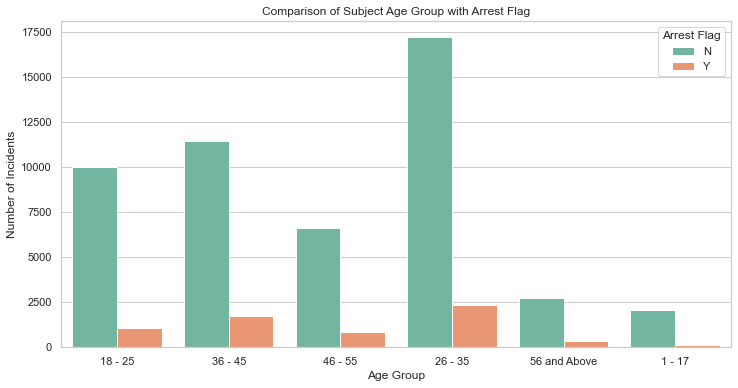

In [3490]:
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the count plot
sns.countplot(data=df, x='Subject Age Group', hue='Arrest Flag', palette='Set2')

# Set the title and labels
plt.title('Comparison of Subject Age Group with Arrest Flag')
plt.xlabel('Age Group')
plt.ylabel('Number of Incidents')

plt.show();

### *Stop Resolution Comparison*

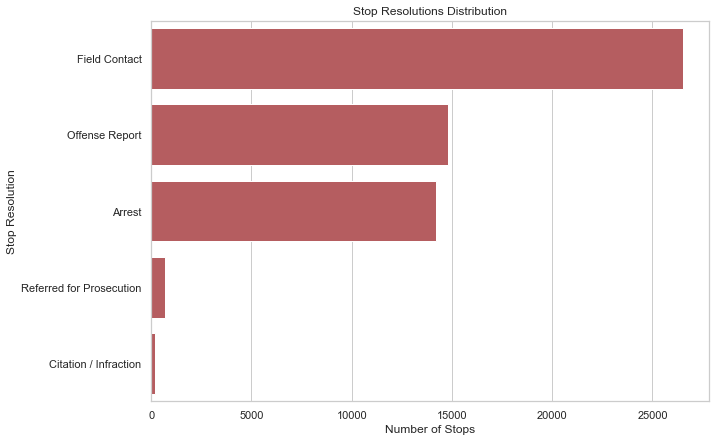

In [3491]:
# Identify unique values 
df["Stop Resolution"].unique()

# Get the value counts for 'Stop Resolution'
resolution_counts = df['Stop Resolution'].value_counts()

# Plotting the horizontal bar graph
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

sns.barplot(x=resolution_counts.values, y=resolution_counts.index, ax=ax, orient='h', color="r")

ax.set(xlabel='Number of Stops', 
       ylabel='Stop Resolution', 
       title='Stop Resolutions Distribution')

plt.show();

Here's a breakdown of the data presented:

- Field Contact: This is the most common resolution, with approximately 28,000-29,000 stops resulting in this outcome. Field contacts typically involve an officer interacting with an individual without making an arrest.
Offense Report: The second most common resolution, with about 15,000 stops resulting in an offense report being filed.  
- Arrest: Close behind offense reports, arrests occur in roughly 14,000-15,000 stops.  
- Referred for Prosecution: This is a much less common outcome, with only about 1,000 stops resulting in referral for prosecution.  
- Citation / Infraction: This appears to be the least common resolution, with a very small number of stops (less than 500) resulting in a citation or infraction.  

### *Distribution of Races for both Officers and Subject*

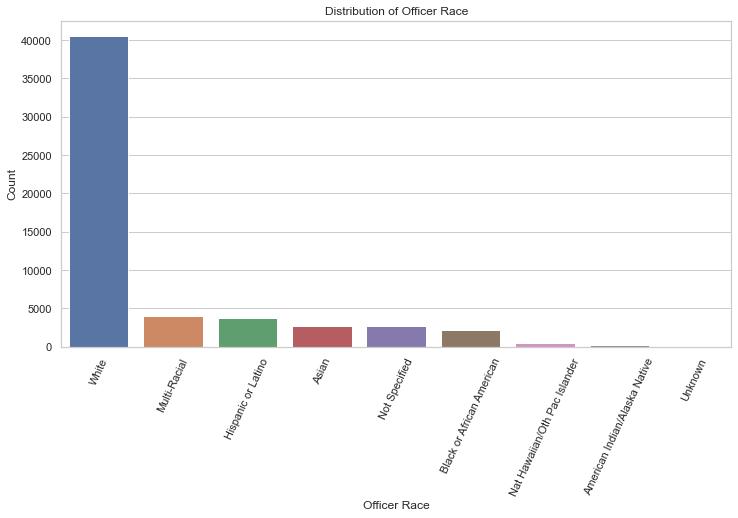

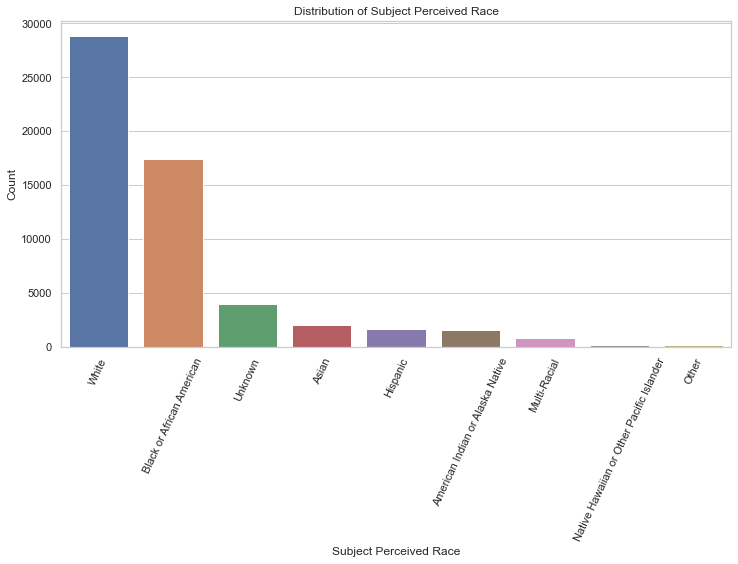

In [3492]:
# Plotting Officer Race
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Officer Race'].value_counts().index, 
            y=df['Officer Race'].value_counts().values)
plt.title('Distribution of Officer Race')
plt.xlabel('Officer Race')
plt.ylabel('Count')
plt.xticks(rotation=65)  # Rotate x-axis labels for better readability
plt.show();

# Plotting Subject Perceived Race
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Subject Perceived Race'].value_counts().index, 
            y=df['Subject Perceived Race'].value_counts().values)
plt.title('Distribution of Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Count')
plt.xticks(rotation=65)  # Rotate x-axis labels for better readability
plt.show();

Key observations:  

Officer Race  

- White officers make up the vast majority of the police force represented in this data.  
- There's a significant drop-off between the number of White officers and all other racial categories.  
- Officers of color (non-White) are represented in much smaller numbers across various racial categories.  
- Some racial categories have very low representation, particularly American Indian/Alaska Native and Native Hawaiian/Pacific Islander.    

Subject Perceived Race  

- White subjects make up the largest group, followed by Black or African American subjects.  
- There's a significant gap between the number of White subjects and all other racial categories.  
- The "Unknown" category is notably large, suggesting that race was not determined or recorded in many cases.  
- Some racial categories have very low representation, particularly Native Hawaiian/Pacific Islander and Other.  
- The distribution of subject races differs significantly from the distribution of officer races seen in the previous chart.  

### *Stops by Officer*  

Now, let's see what are the first 10 officers that stopped more people.

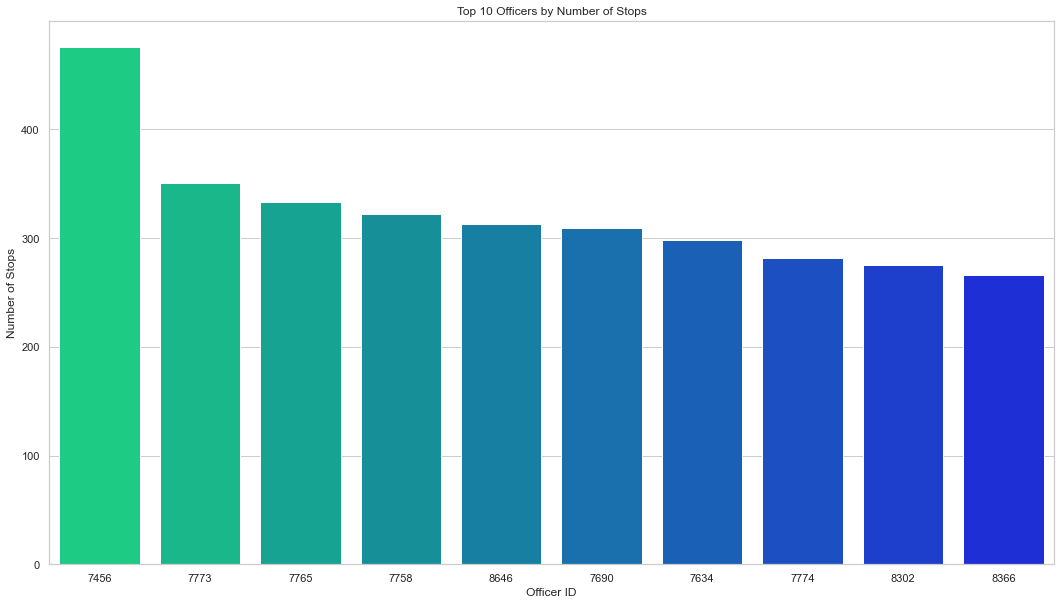

In [3493]:
officer_counts = df["Officer ID"].value_counts()
df_officer_counts = pd.DataFrame(officer_counts).reset_index()

# Rename the columns for clarity
df_officer_counts.columns = ['Officer ID', 'Count']

# Take the top 10 most frequent Officer IDs
df_officer_counts_slice = df_officer_counts[:10]

# Create x and y data for plotting
x_counts = df_officer_counts_slice['Officer ID']  # Officer IDs
y_counts = df_officer_counts_slice['Count']  # Their counts

# Plotting
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)

sns.barplot(x=x_counts, y=y_counts, palette='winter_r')

ax.set_title('Top 10 Officers by Number of Stops')
ax.set_xlabel('Officer ID')
ax.set_ylabel('Number of Stops')

plt.show()

Key observations:

- Officer ID 7456 conducted the most stops, with over 500 stops. This is significantly higher than the other officers in the top 10.  
- The remaining officers (7773, 7634, 7690, 8646, 7765, 7758, 8366, 8302, 7774) have a relatively similar number of stops, all ranging between approximately 300 and 350 stops.  
- The difference in the number of stops between Officer 7456 and the other officers is substantial, indicating that this officer conducted considerably more stops than others in the top 10 list.

### *Stops by Officer Squad* 

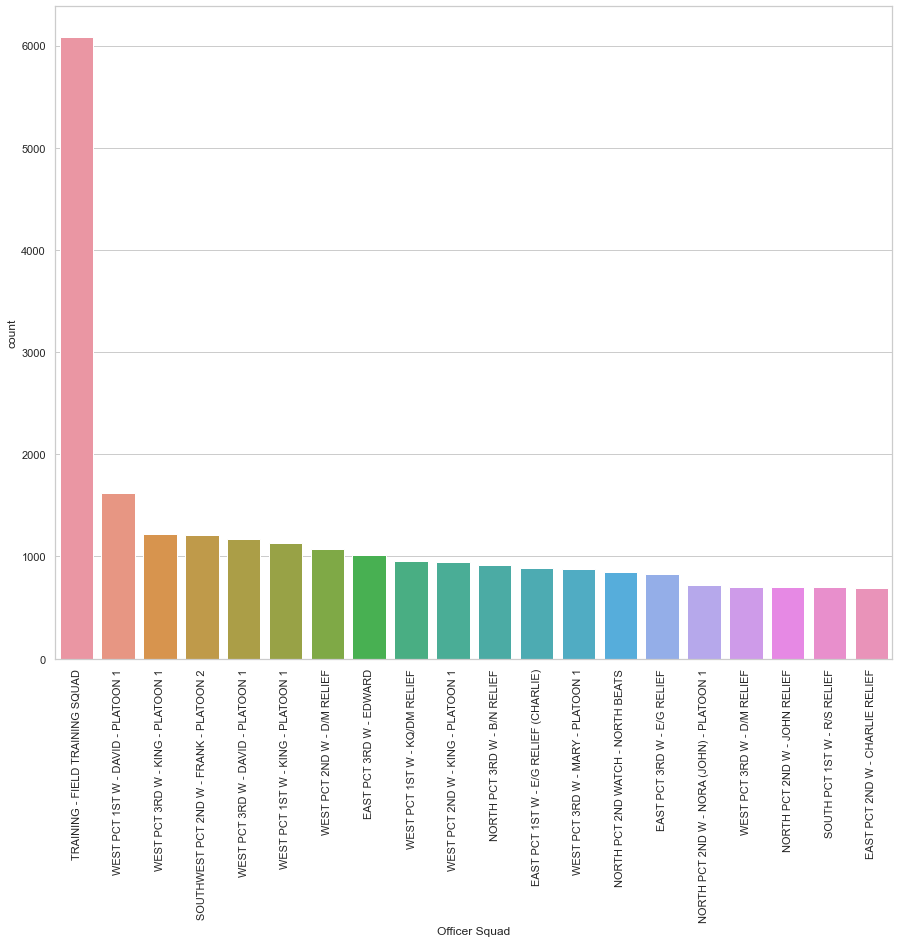

In [3494]:
sns.set_palette('Blues')
fig, ax = plt.subplots()
fig.set_size_inches(15,12)

x_squads = df["Officer Squad"].value_counts().index[:20]
y_squads = df["Officer Squad"].value_counts()[:20]

graph_squads = sns.barplot(x=x_squads, y=y_squads, data=df )

for item in graph_squads.get_xticklabels():
    item.set_rotation(90)

plt.show();

Key observations:  
- The data suggests that different squads have varying levels of involvement in stops, which could reflect their differing roles within the police force.
- The high number of stops associated with training squads may indicate that a significant portion of stops is conducted by officers who are still undergoing training, which could have implications for the overall approach and experience level during stops.

### *Stops by Precinct*  

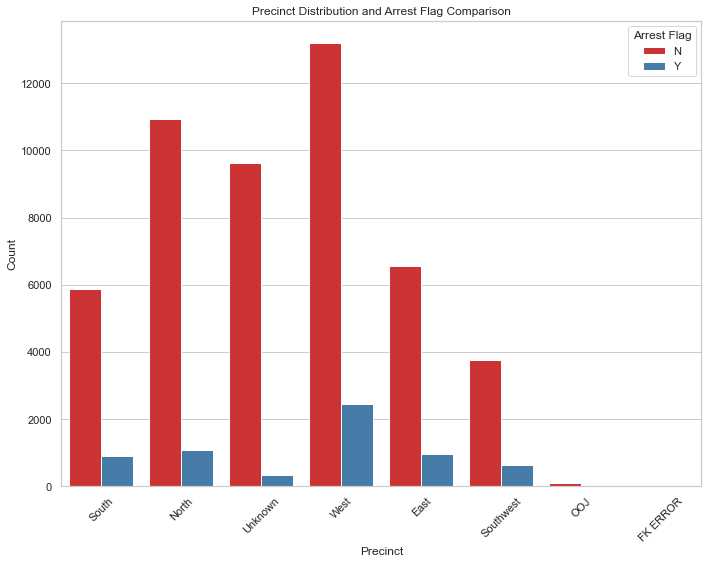

In [3495]:
# Plotting
plt.figure(figsize=(10, 8))

# Grouped bar plot
sns.countplot(data=df, x='Precinct', hue='Arrest Flag', palette='Set1')

# Add titles and labels
plt.title('Precinct Distribution and Arrest Flag Comparison')
plt.ylabel('Count')
plt.xlabel('Precinct')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show();

### *Occurrence by Sector*

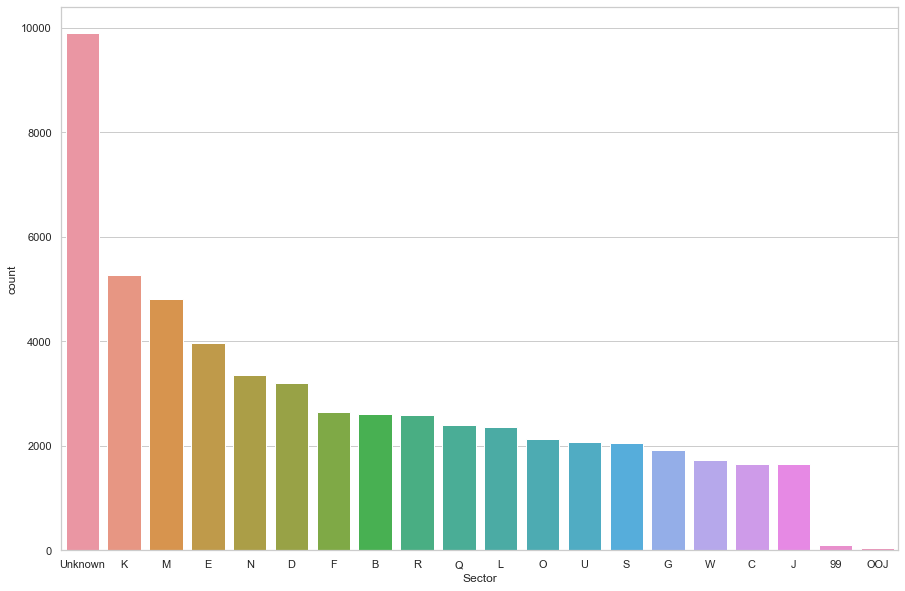

In [3496]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

x_sector = df["Sector"].value_counts().index
y_sector = df["Sector"].value_counts()

graph_sectors = sns.barplot(x=x_sector, y=y_sector, data=df)

plt.show();

Insights:

- The "Unknown" category has a significantly higher count than any other sector, suggesting that a large portion of the data is not classified into a specific sector.
- The other sectors show a more even distribution, with some variation in counts.

### *Top 5 Weapon Type and Arrest Flag Comparison*   

Let's see what are the top 5 Weapon Type in our Dataset so as to capture all the weapons that were found in incidents of both Arrests and no Arrest

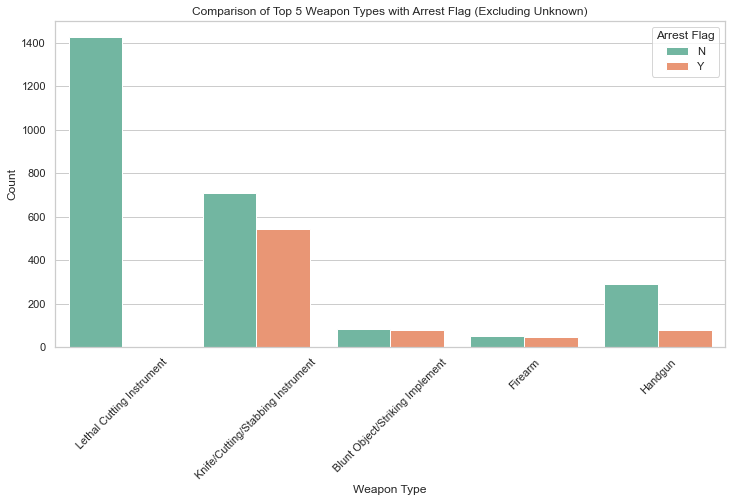

In [3497]:
# Set the visual style of the plots
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(12, 6))

# Drop the 'Unknown' value from the 'Weapon Type' column
df_filtered = df[df['Weapon Type'] != 'Unknown']

# Filter for the top 5 weapon types after dropping 'Unknown'
top_weapon_types = df_filtered['Weapon Type'].value_counts().nlargest(5).index
df_top_weapons = df_filtered[df_filtered['Weapon Type'].isin(top_weapon_types)]

# Create a count plot
sns.countplot(data=df_top_weapons, x='Weapon Type', hue='Arrest Flag', palette='Set2')

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Comparison of Top 5 Weapon Types with Arrest Flag (Excluding Unknown)')
plt.xlabel('Weapon Type')
plt.ylabel('Count')

plt.show();


### *Top 5 Weapon Types by Top 10 Officers with Highest Number of Stops*

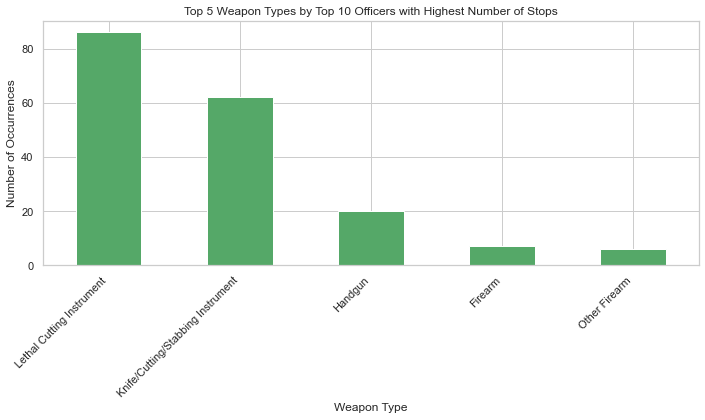

In [3498]:
# Identify the top 10 officers with the highest number of stops
top_10_officers = df['Officer ID'].value_counts().head(10).index

# Filter the dataframe to include only the stops made by these top 10 officers
top_officer_stops = df[df['Officer ID'].isin(top_10_officers)]

# Count the occurrences of each weapon type for these top officers
weapon_counts = top_officer_stops['Weapon Type'].value_counts()

# Extract the top 5 weapon types, excluding "Unknown" values
filtered_weapon_counts = weapon_counts[~weapon_counts.index.isin(['Unknown', 'No Weapon'])]

# Extract the top 5 weapon types after filtering
top_5_weapons_filtered = filtered_weapon_counts.head(5)

# Plot the top 5 weapon types after filtering
plt.figure(figsize=(10, 6))
top_5_weapons_filtered.plot(kind='bar', color='g')
plt.title('Top 5 Weapon Types by Top 10 Officers with Highest Number of Stops')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show();

Key observations:

- Cutting instruments (both large and knife/cutting/stabbing) are by far the most commonly encountered weapons among these top 10 officers, similar to the general trend seen in the previous chart.  
- Handguns are the third most common, but occur much less frequently than cutting instruments.  
- Firearms are relatively rare compared to the other categories.  
- The pattern is consistent with the overall weapon type distribution seen in the previous chart, suggesting that these top officers' experiences are representative of the broader trends.  
- The number of occurrences is much lower than in the previous chart, which is expected as this only represents data from 10 specific officers. 

### *Distribution of Genders of Officers at the Stops*

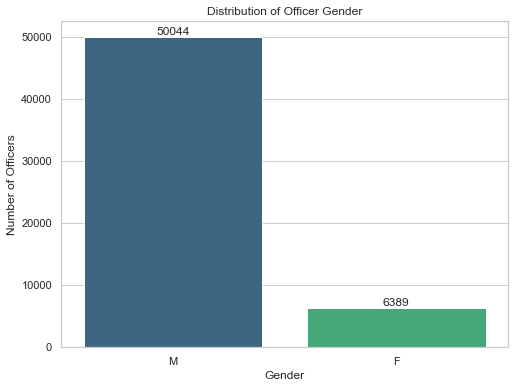

In [3499]:
# Set the style for the plot
sns.set(style="whitegrid")

# Count the occurrences of each gender
gender_counts = df['Officer Gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")

# Annotate the bars with the count values
for i, value in enumerate(gender_counts.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Distribution of Officer Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Officers')

# Show the plot
plt.show();

Key Observations:

The plot shows a strong gender imbalance among officers, with a majority being male. Female officers are fewer, and non-binary or unspecified genders are extremely rare in this dataset. 

Gender Imbalance: The chart highlights a stark gender imbalance within the police force, with male officers being the predominant gender. This could have implications for the dynamics within the force and the broader impact on community interactions and perceptions of law enforcement. 


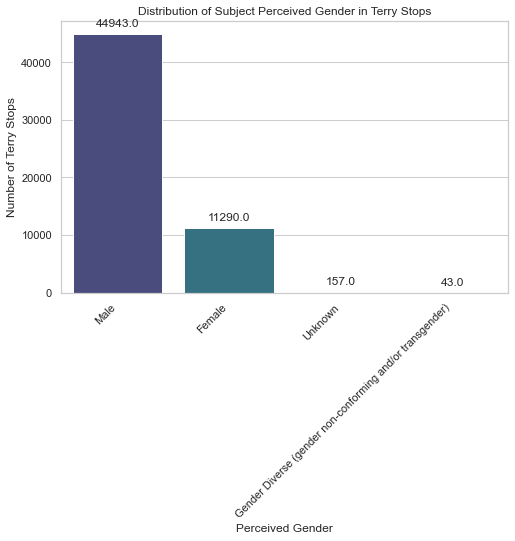

In [3500]:
# Filter data to focus on the 'Subject Perceived Gender' column
gender_data = df['Subject Perceived Gender'].value_counts()

# Plotting the distribution with values on top of the bars
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=gender_data.index, y=gender_data.values, palette="viridis")

# Adding title and labels
plt.title('Distribution of Subject Perceived Gender in Terry Stops')
plt.xlabel('Perceived Gender')
plt.ylabel('Number of Terry Stops')

# Adding values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show();

The bar chart displays the distribution of Terry Stops based on the **Subject Perceived Gender**. Here are some observations:

- **Predominance of Male Stops**: The majority of Terry Stops involve individuals perceived as male, with a count of 48,385. This significantly outweighs the number of stops for any other perceived gender category.  

- **Female Stops**: The second-highest category is for individuals perceived as female, with 12,126 stops. This is much lower compared to the stops involving males, highlighting a gender disparity in the stops.

Low Counts for Other Categories:

- **Unknown**: There are 426 stops where the subject's perceived gender is unknown. This might include cases where the gender couldn't be determined or was not recorded.  
- **Gender Diverse**: The category "Gender Diverse (gender non-conforming and/or transgender)" has 45 stops, indicating a relatively small number of stops involving individuals perceived as gender non-conforming or transgender.
Multiple Subjects: There are 2 instances where the stop involved multiple subjects, possibly of different genders, leading to a minimal count in this category.  
- **Skewed Distribution**: The chart shows a highly skewed distribution, with the overwhelming majority of stops involving individuals perceived as male, and much fewer involving other gender identities. This could indicate a bias in how or whom law enforcement engages during Terry Stops.

### *Weapon Types Counts Per Subject Perceived Race*

<Figure size 864x576 with 0 Axes>

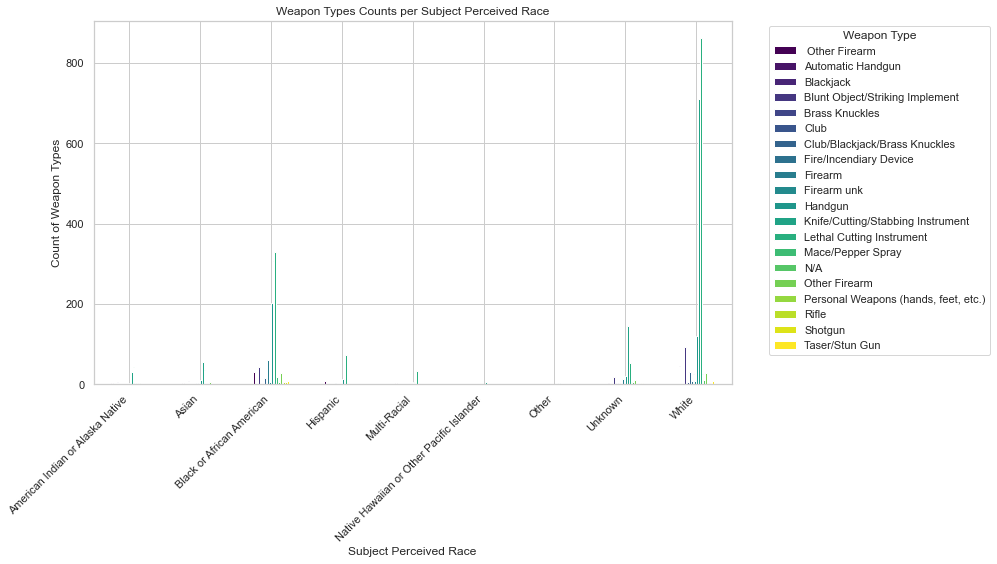

In [3501]:
# Filter out the 'Unknown' and 'None/Not Applicable' weapon types if needed
filtered_df = df[~df['Weapon Type'].isin(['Unknown', 'No Weapon'])]

# Group by 'Subject Perceived Race' and 'Weapon Type' and count occurrences
race_weapon_counts = filtered_df.groupby(['Subject Perceived Race', 'Weapon Type']).size().unstack()

# Plot the grouped bar plot
plt.figure(figsize=(12, 8))
race_weapon_counts.plot(kind='bar', stacked=False, colormap='viridis', figsize=(14, 8))

# Add title and labels
plt.title('Weapon Types Counts per Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Count of Weapon Types')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.legend(title='Weapon Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();

Observations:

- The most noticeable peaks are within the "White" and "Black or African American" categories, suggesting that these groups have higher counts of weapon types reported.  
- The "White" category has a particularly high count, with a notable peak associated with a specific weapon type.  
- The "Black or African American" category also shows a significant count, but it’s lower than the "White" category.  
- Other racial categories have relatively lower counts across all weapon types.  

### *Arrest Flag and Frisk Flag Comparison*

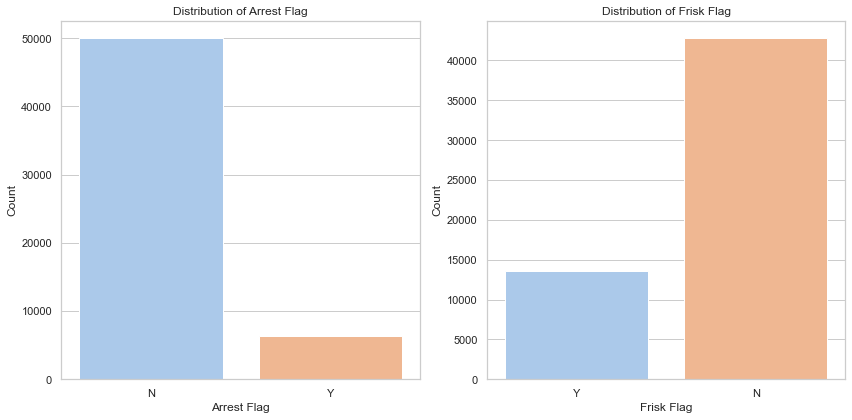

In [3502]:
# Plotting Arrest Flag distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Arrest Flag', data=df, palette='pastel')
plt.title('Distribution of Arrest Flag')
plt.xlabel('Arrest Flag')
plt.ylabel('Count')

# Plotting Frisk Flag distribution
plt.subplot(1, 2, 2)
sns.countplot(x='Frisk Flag', data=df, palette='pastel')
plt.title('Distribution of Frisk Flag')
plt.xlabel('Frisk Flag')
plt.ylabel('Count')

plt.tight_layout()
plt.show();

From the separate plots for the Arrest Flag and Frisk Flag, here are the observations

Arrest Flag Distribution (Left Plot):  
- The majority of incidents did not result in an arrest (denoted by 'N').  
- A smaller number of incidents resulted in an arrest (denoted by 'Y').  

Frisk Flag Distribution (Right Plot):  
- Most incidents did not involve a frisk (denoted by 'N').  
- A substantial number of incidents involved a frisk (denoted by 'Y').

### *Frisk Flag and Arrest Flag Comparison Against Subject Perceived Race*

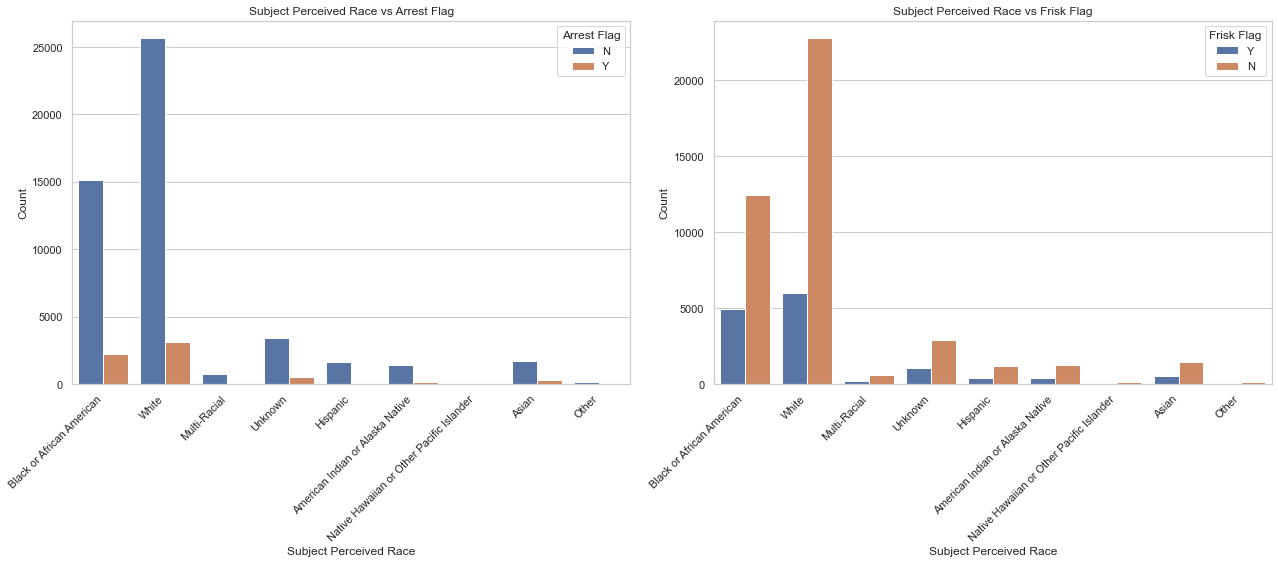

In [3503]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Arrest Flag
sns.countplot(data=df, x='Subject Perceived Race', hue='Arrest Flag', ax=axes[0])
axes[0].set_title('Subject Perceived Race vs Arrest Flag')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Subject Perceived Race')

# Rotate and align the x-axis labels
for label in axes[0].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

# Plot for Frisk Flag
sns.countplot(data=df, x='Subject Perceived Race', hue='Frisk Flag', ax=axes[1])
axes[1].set_title('Subject Perceived Race vs Frisk Flag')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Subject Perceived Race')
axes[1].tick_params(axis='x', rotation=45)

# Rotate and align the x-axis labels
for label in axes[1].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

plt.tight_layout()
plt.show();

1. Subject Perceived Race vs Arrest Flag (Left Plot):

- White: This group shows the highest number of stops overall, with a significant majority not resulting in an arrest (indicated by the taller blue bar for False compared to the orange bar for True).
- Black or African American: The second highest number of stops occurred in this group. Similar to the white group, most stops did not result in an arrest, but the proportion of arrests to non-arrests seems higher compared to the white group.
- Other Races (e.g., Hispanic, Asian): These groups have significantly fewer stops, and similarly, the majority do not result in arrests.

2. Subject Perceived Race vs Frisk Flag (Right Plot):
- White: The pattern is similar to the arrest data, where most stops did not result in a frisk, though the number of frisks (True) is higher here than the number of arrests (True).
- Black or African American: This group also shows a significant number of frisks, with a relatively higher proportion of stops leading to frisks compared to other racial groups.
- Other Races: Similar trends are observed where the majority of stops do not result in frisks, and the overall number of stops is low compared to the white and Black or African American groups.

**General Observations**:
- **Disparity in Stops**: The data suggests that there are far more stops involving individuals perceived to be White and Black or African American compared to other racial groups.
- **Disparity in Arrests and Frisks**: While the majority of stops do not result in arrests or frisks for all groups, the proportion of arrests and frisks is notably higher among stops involving Black or African American individuals compared to White individuals.

### *Top 10 Officer YOB with Highest Stop Counts*

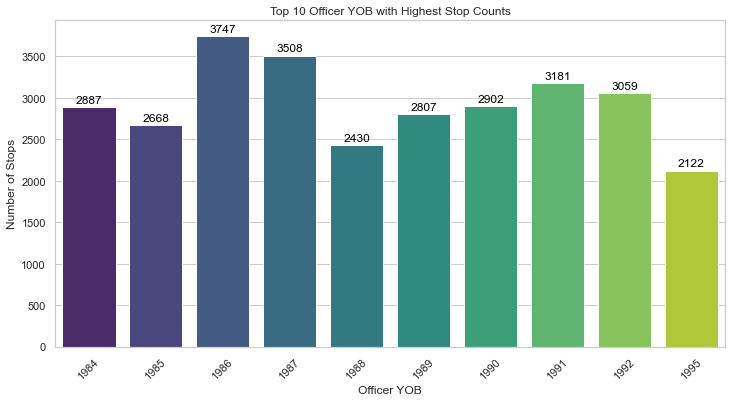

In [3504]:
# Count the number of stops per Officer YOB
officer_yob_counts = df['Officer YOB'].value_counts().head(10).sort_index()

# Create a bar plot for the top 10 Officer YOB with the highest stop counts
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=officer_yob_counts.index, 
                      y=officer_yob_counts.values, 
                      palette='viridis')

# Annotate the bars with the respective counts
for index, value in enumerate(officer_yob_counts.values):
    barplot.text(index, value + 50, f'{value}', ha='center', color='black')

plt.title('Top 10 Officer YOB with Highest Stop Counts')
plt.xlabel('Officer YOB')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show();

The plot above shows the distribution of the top 10 officer years of birth (YOB) with the highest number of stops. Here are some key observations:
 
1. Highest Stop Counts:  
    - Officers born in 1986 have the highest number of stops, with a count of 3,747. This indicates that officers born in this year are the most frequently involved in stops compared to other years of birth.  
    - The second-highest number of stops is for officers born in 1987, with 3,508 stops.  

2. Range of Stop Counts:  
    - The number of stops for the top 10 YOBs ranges from 2,122 (for 1995) to 3,747 (for 1986). This indicates a fairly significant variation in stop activity among officers born in different years within this top group.  
 
3. General Trend:  
    - The data doesn't show a clear linear trend across years, but there are clusters of high activity. For example, the years 1986, 1987, and 1991 have relatively high counts, while 1985 and 1995 have lower counts within this top 10 group.  

**Potential Insights**:  
    - The clustering of higher stop counts in certain years could be related to factors such as the number of officers hired during those years, experience levels, or specific policies in place during their tenure. Officers born in these years might also be at a particular stage in their careers where they are more active in making stops.  
    - The relatively lower stop counts for officers born in 1995 could indicate that these officers are newer to the force and might not have had as many opportunities to make stops, or they might be in different roles.

In [3505]:
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,18 - 25,-1,20170000017766,230380,Offense Report,Unknown,6728,1973,M,Multi-Racial,...,08:03:00,ASLT - PERSON SHOT OR SHOT AT,--DRIVE BY SHOOTING - NO INJURIES,911,SOUTH PCT 1ST W - R/S RELIEF,N,Y,South,S,S2
2,36 - 45,7735709716,20200000186847,13469755649,Field Contact,Unknown,6414,1964,M,Asian,...,01:27:52,OBS - DOWN - CHECK FOR PERSON DOWN,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - NORA (JOHN) - PLATOON 1,N,N,North,N,N2
3,46 - 55,-1,20170000149189,460834,Arrest,Unknown,5491,1967,M,Black or African American,...,09:53:00,ASLT - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,NORTH PCT 1ST W - LINCOLN (UNION) - PLATOON 1,N,Y,North,L,L3
4,46 - 55,-1,20160000001969,153868,Field Contact,Unknown,6899,1977,M,White,...,21:57:00,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN - PLATOON 1,N,N,Unknown,Unknown,Unknown
5,46 - 55,7728988384,20220000171470,34609155925,Field Contact,Unknown,7499,1974,M,White,...,16:53:34,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,EAST PCT 3RD W - EDWARD,N,N,West,K,K3


### *Feature Engineering of Reported Date and Reported Time Variables*

In [3506]:
# Show the Data type of Reported Date

df['Reported Date'].dtype

dtype('O')

In [3507]:
# parse the dates, currently coded as strings, into datetime format

df['Reported Date'] = pd.to_datetime(df['Reported Date'])

In [3508]:
# extract year from date

df['Reported Year'] = df['Reported Date'].dt.year

df['Reported Year'].head()

0    2017
2    2020
3    2017
4    2016
5    2022
Name: Reported Year, dtype: int32

In [3509]:
# extract month from date

df['Reported Month'] = df['Reported Date'].dt.month

df['Reported Month'].head()

0    1
2    6
3    4
4    5
5    7
Name: Reported Month, dtype: int32

In [3510]:
# extract day from date

df['Reported Day'] = df['Reported Date'].dt.day

df['Reported Day'].head()

0    15
2    13
3    29
4    10
5     4
Name: Reported Day, dtype: int32

In [3511]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56433 entries, 0 to 60983
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Subject Age Group         56433 non-null  object        
 1   Subject ID                56433 non-null  int64         
 2   GO / SC Num               56433 non-null  int64         
 3   Terry Stop ID             56433 non-null  int64         
 4   Stop Resolution           56433 non-null  object        
 5   Weapon Type               56433 non-null  object        
 6   Officer ID                56433 non-null  object        
 7   Officer YOB               56433 non-null  int64         
 8   Officer Gender            56433 non-null  object        
 9   Officer Race              56433 non-null  object        
 10  Subject Perceived Race    56433 non-null  object        
 11  Subject Perceived Gender  56433 non-null  object        
 12  Reported Date          

We can see that there are three additional columns created from `Reported Date` variable. Now, I will drop the original `Reported Date` variable from the dataset.

In [3512]:
# drop the original Date variable

df.drop('Reported Date', axis=1, inplace = True)

In [3513]:
df["Reported Time"].dtypes

dtype('O')

In [3514]:
df["Reported Time"].head()

0    08:03:00
2    01:27:52
3    09:53:00
4    21:57:00
5    16:53:34
Name: Reported Time, dtype: object

As we can see `Reported Time` is an variable is object. I will parse the time currently coded as object into datetime format.

In [3515]:
# Convert the 'Reported Time' column to datetime objects
df['Reported Time'] = pd.to_datetime(df['Reported Time'], format='%H:%M:%S')

# Create new columns for hour, minute, and second
df['Hour'] = df['Reported Time'].dt.hour
df['Minute'] = df['Reported Time'].dt.minute
df['Second'] = df['Reported Time'].dt.second

df.drop('Reported Time', axis=1, inplace = True)

In [3516]:
# preview the dataset again

df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Frisk Flag,Precinct,Sector,Beat,Reported Year,Reported Month,Reported Day,Hour,Minute,Second
0,18 - 25,-1,20170000017766,230380,Offense Report,Unknown,6728,1973,M,Multi-Racial,...,Y,South,S,S2,2017,1,15,8,3,0
2,36 - 45,7735709716,20200000186847,13469755649,Field Contact,Unknown,6414,1964,M,Asian,...,N,North,N,N2,2020,6,13,1,27,52
3,46 - 55,-1,20170000149189,460834,Arrest,Unknown,5491,1967,M,Black or African American,...,Y,North,L,L3,2017,4,29,9,53,0
4,46 - 55,-1,20160000001969,153868,Field Contact,Unknown,6899,1977,M,White,...,N,Unknown,Unknown,Unknown,2016,5,10,21,57,0
5,46 - 55,7728988384,20220000171470,34609155925,Field Contact,Unknown,7499,1974,M,White,...,N,West,K,K3,2022,7,4,16,53,34


### ***Explore Categorical Variables***

Now, I will explore the categorical variables

In [3517]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Initial Call Type', 'Final Call Type',
       'Call Type', 'Officer Squad', 'Arrest Flag', 'Frisk Flag', 'Precinct',
       'Sector', 'Beat', 'Reported Year', 'Reported Month', 'Reported Day',
       'Hour', 'Minute', 'Second'],
      dtype='object')

In [3518]:
df.shape

(56433, 27)

In [3519]:
# To get a full breakdown of all values in the column
value_count = df['Weapon Type'].value_counts(normalize=True)
value_count

Weapon Type
Unknown                                 0.934967
Lethal Cutting Instrument               0.025304
Knife/Cutting/Stabbing Instrument       0.022150
Handgun                                 0.006574
Blunt Object/Striking Implement         0.002906
Firearm                                 0.001807
 Other Firearm                          0.001630
Other Firearm                           0.001240
Mace/Pepper Spray                       0.000921
Club/Blackjack/Brass Knuckles           0.000851
Taser/Stun Gun                          0.000319
N/A                                     0.000319
Firearm unk                             0.000266
Fire/Incendiary Device                  0.000213
Rifle                                   0.000177
Club                                    0.000142
Shotgun                                 0.000106
Automatic Handgun                       0.000035
Personal Weapons (hands, feet, etc.)    0.000035
Brass Knuckles                          0.000018
Blackjac

Dropping `Weapon Type` column because it have 93.5 % Unknown weapons and this will highly impact our model 

In [3520]:
# Dropping Weapon Type 
df.drop('Weapon Type', axis=1, inplace=True)

Let's look at the number of categorical variables that we have in our DataFrame

In [3521]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 16 categorical variables

The categorical variables are : ['Subject Age Group', 'Stop Resolution', 'Officer ID', 'Officer Gender', 'Officer Race', 'Subject Perceived Race', 'Subject Perceived Gender', 'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad', 'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat']


Explanation of Categorical Variables:
 
- Binary Variables: Variables like "Frisk Flag" and "Arrest Flag" are binary, indicating two possible outcomes (e.g., "Yes" or "No"). 
-  Nominal Variables: The rest of the variables represent categories without any inherent order.
  
### *Checking for Cardinality*

In [3522]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Subject Age Group  contains  6  labels
Stop Resolution  contains  5  labels
Officer ID  contains  1354  labels
Officer Gender  contains  2  labels
Officer Race  contains  9  labels
Subject Perceived Race  contains  9  labels
Subject Perceived Gender  contains  4  labels
Initial Call Type  contains  177  labels
Final Call Type  contains  193  labels
Call Type  contains  7  labels
Officer Squad  contains  262  labels
Arrest Flag  contains  2  labels
Frisk Flag  contains  2  labels
Precinct  contains  8  labels
Sector  contains  20  labels
Beat  contains  55  labels


### *Frequency Count of Categorical Variables*

Now, I will check the frequency counts of categorical variables.

In [3523]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

Subject Age Group
26 - 35         19546
36 - 45         13118
18 - 25         11068
46 - 55          7440
56 and Above     3074
1 - 17           2187
Name: count, dtype: int64
Stop Resolution
Field Contact               26501
Offense Report              14809
Arrest                      14230
Referred for Prosecution      697
Citation / Infraction         196
Name: count, dtype: int64
Officer ID
7456    476
7773    351
7765    333
7758    322
8646    313
       ... 
6287      1
8952      1
7461      1
5843      1
7464      1
Name: count, Length: 1354, dtype: int64
Officer Gender
M    50044
F     6389
Name: count, dtype: int64
Officer Race
White                            40525
Multi-Racial                      3959
Hispanic or Latino                3701
Asian                             2676
Not Specified                     2638
Black or African American         2166
Nat Hawaiian/Oth Pac Islander      519
American Indian/Alaska Native      222
Unknown                             27
Na

In [3524]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts(normalize=True))

Subject Age Group
26 - 35         0.346358
36 - 45         0.232453
18 - 25         0.196126
46 - 55         0.131838
56 and Above    0.054472
1 - 17          0.038754
Name: proportion, dtype: float64
Stop Resolution
Field Contact               0.469601
Offense Report              0.262417
Arrest                      0.252157
Referred for Prosecution    0.012351
Citation / Infraction       0.003473
Name: proportion, dtype: float64
Officer ID
7456    0.008435
7773    0.006220
7765    0.005901
7758    0.005706
8646    0.005546
          ...   
6287    0.000018
8952    0.000018
7461    0.000018
5843    0.000018
7464    0.000018
Name: proportion, Length: 1354, dtype: float64
Officer Gender
M    0.886786
F    0.113214
Name: proportion, dtype: float64
Officer Race
White                            0.718108
Multi-Racial                     0.070154
Hispanic or Latino               0.065582
Asian                            0.047419
Not Specified                    0.046746
Black or African Amer

In [3525]:
df[categorical].head()

,Subject Age Group,Stop Resolution,Officer ID,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,18 - 25,Offense Report,6728,M,Multi-Racial,Black or African American,Male,ASLT - PERSON SHOT OR SHOT AT,--DRIVE BY SHOOTING - NO INJURIES,911,SOUTH PCT 1ST W - R/S RELIEF,N,Y,South,S,S2
2,36 - 45,Field Contact,6414,M,Asian,White,Female,OBS - DOWN - CHECK FOR PERSON DOWN,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - NORA (JOHN) - PLATOON 1,N,N,North,N,N2
3,46 - 55,Arrest,5491,M,Black or African American,White,Male,ASLT - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,NORTH PCT 1ST W - LINCOLN (UNION) - PLATOON 1,N,Y,North,L,L3
4,46 - 55,Field Contact,6899,M,White,Multi-Racial,Male,Unknown,Unknown,Unknown,NORTH PCT 3RD W - LINCOLN - PLATOON 1,N,N,Unknown,Unknown,Unknown
5,46 - 55,Field Contact,7499,M,White,White,Male,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,EAST PCT 3RD W - EDWARD,N,N,West,K,K3


In [3526]:
df[categorical].isna().sum()

Subject Age Group           0
Stop Resolution             0
Officer ID                  0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

### *Explore `Subject Age Group` Variable*

In [3527]:
# print number of labels in Subject Age Group variable

print('Subject Age Group contains', len(df["Subject Age Group"].unique()), 'labels')

Subject Age Group contains 6 labels


In [3528]:
# check labels in Subject Age Group variable

df['Subject Age Group'].unique()

array(['18 - 25', '36 - 45', '46 - 55', '26 - 35', '56 and Above',
       '1 - 17'], dtype=object)

In [3529]:
# check frequency distribution of values in Subject Age Group variable

df["Subject Age Group"].value_counts()

Subject Age Group
26 - 35         19546
36 - 45         13118
18 - 25         11068
46 - 55          7440
56 and Above     3074
1 - 17           2187
Name: count, dtype: int64

In [3530]:
# let's do One Hot Encoding of Subject Age group variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df["Subject Age Group"], drop_first=True).head()

,18 - 25,26 - 35,36 - 45,46 - 55,56 and Above
0,True,False,False,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False


### *Explore `Stop Resolution` Variable*

In [3531]:
# print number of labels in Stop Resolution variable

print('Stop Resolution contains', len(df["Stop Resolution"].unique()), 'labels')

Stop Resolution contains 5 labels


In [3532]:
# check labels in Stop Resolution variable

df['Stop Resolution'].unique()

array(['Offense Report', 'Field Contact', 'Arrest',
       'Citation / Infraction', 'Referred for Prosecution'], dtype=object)

In [3533]:
# check frequency distribution of values in Stop Resolution variable

df['Stop Resolution'].value_counts()

Stop Resolution
Field Contact               26501
Offense Report              14809
Arrest                      14230
Referred for Prosecution      697
Citation / Infraction         196
Name: count, dtype: int64

In [3534]:
# let's do One Hot Encoding of Stop Resolution variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Stop Resolution'], drop_first=True).head()

,Citation / Infraction,Field Contact,Offense Report,Referred for Prosecution
0,False,False,True,False
2,False,True,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False


In [3535]:
# print number of labels in Officer ID variable

print('Officer ID contains', len(df["Officer ID"].unique()), 'labels')

Officer ID contains 1354 labels


In [3536]:
# check labels in Officer ID variable

df['Officer ID'].unique()

array(['6728', '6414', '5491', ..., '6231', '6845', '6855'], dtype=object)

In [3537]:
# check frequency distribution of values in Officer ID variable

df["Officer ID"].value_counts()

Officer ID
7456    476
7773    351
7765    333
7758    322
8646    313
       ... 
6287      1
8952      1
7461      1
5843      1
7464      1
Name: count, Length: 1354, dtype: int64

In [3538]:
# let's do One Hot Encoding of Officer ID variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df["Officer ID"], drop_first=True).head()

,3170,4161,4272,4331,4494,4579,4585,4617,4706,4729,...,8986,8987,8989,8990,8991,8992,8993,8997,8998,9000
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### *Explore `Officer Gender` variable*

In [3539]:
# print number of labels in Officer Gender variable

print('Officer Gender contains', len(df['Officer Gender'].unique()), 'labels')

Officer Gender contains 2 labels


In [3540]:
# check labels in Officer Gender variable

df['Officer Gender'].unique()

array(['M', 'F'], dtype=object)

In [3541]:
# check frequency distribution of values in Officer Gender variable

df['Officer Gender'].value_counts()

Officer Gender
M    50044
F     6389
Name: count, dtype: int64

In [3542]:
# let's do One Hot Encoding of Office Gender variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Officer Gender'], drop_first=True).head()

,M
0,True
2,True
3,True
4,True
5,True


### *Explore `Officer Race` Variable*

In [3543]:
# print number of labels in Officer Race variable

print('Officer Race contains', len(df['Officer Race'].unique()), 'labels')

Officer Race contains 9 labels


In [3544]:
# check labels in Officer Race variable

df['Officer Race'].unique()

array(['Multi-Racial', 'Asian', 'Black or African American', 'White',
       'Hispanic or Latino', 'Not Specified',
       'Nat Hawaiian/Oth Pac Islander', 'American Indian/Alaska Native',
       'Unknown'], dtype=object)

In [3545]:
# check frequency distribution of values in Officer Race variable

df['Officer Race'].value_counts()

Officer Race
White                            40525
Multi-Racial                      3959
Hispanic or Latino                3701
Asian                             2676
Not Specified                     2638
Black or African American         2166
Nat Hawaiian/Oth Pac Islander      519
American Indian/Alaska Native      222
Unknown                             27
Name: count, dtype: int64

In [3546]:
# let's do One Hot Encoding of Officer Race variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Officer Race'], drop_first=True).head()

,Asian,Black or African American,Hispanic or Latino,Multi-Racial,Nat Hawaiian/Oth Pac Islander,Not Specified,Unknown,White
0,False,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True


### *Explore `Subject Perceived Race` Variable*

In [3547]:
# print number of labels in Subject Perceived Race variable

print('Subject Perceived Race contains', len(df['Subject Perceived Race'].unique()), 'labels')

Subject Perceived Race contains 9 labels


In [3548]:
# check labels in Subject Perceived Race variable

df['Subject Perceived Race'].unique()

array(['Black or African American', 'White', 'Multi-Racial', 'Unknown',
       'Hispanic', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander', 'Asian', 'Other'],
      dtype=object)

In [3549]:
# check frequency distribution of values in Subject Perceived Race variable

df['Subject Perceived Race'].value_counts()

Subject Perceived Race
White                                        28774
Black or African American                    17371
Unknown                                       3972
Asian                                         2002
Hispanic                                      1632
American Indian or Alaska Native              1603
Multi-Racial                                   781
Native Hawaiian or Other Pacific Islander      152
Other                                          146
Name: count, dtype: int64

In [3550]:
# let's do One Hot Encoding of Subject Perceived Race variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Subject Perceived Race'], drop_first=True).head()

,Asian,Black or African American,Hispanic,Multi-Racial,Native Hawaiian or Other Pacific Islander,Other,Unknown,White
0,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,True


### *Explore `Subject Perceived Gender` Variable*

In [3551]:
# print number of labels in Subject Perceived Gender variable

print('Subject Perceived Gender contains', len(df['Subject Perceived Gender'].unique()), 'labels')

Subject Perceived Gender contains 4 labels


In [3552]:
# check labels in Subject Perceived Gender variable

df['Subject Perceived Gender'].unique()

array(['Male', 'Female', 'Unknown',
       'Gender Diverse (gender non-conforming and/or transgender)'],
      dtype=object)

In [3553]:
# check frequency distribution of values in Subject Perceived Gender variable

df['Subject Perceived Gender'].value_counts()

Subject Perceived Gender
Male                                                         44943
Female                                                       11290
Unknown                                                        157
Gender Diverse (gender non-conforming and/or transgender)       43
Name: count, dtype: int64

In [3554]:
# let's do One Hot Encoding of Subject Perceived Gender variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Subject Perceived Gender'], drop_first=True).head()

,Gender Diverse (gender non-conforming and/or transgender),Male,Unknown
0,False,True,False
2,False,False,False
3,False,True,False
4,False,True,False
5,False,True,False


### *Explore `Initial Call Type` Variable*

In [3555]:
# print number of labels in Initial Call Type variable

print('Initial Call Type contains', len(df['Initial Call Type'].unique()), 'labels')

Initial Call Type contains 177 labels


In [3556]:
# check labels in Initial Call Type variable

df['Initial Call Type'].unique()

array(['ASLT - PERSON SHOT OR SHOT AT',
       'OBS - DOWN - CHECK FOR PERSON DOWN',
       'ASLT - WITH OR W/O WPNS (NO SHOOTINGS)', 'Unknown',
       'SUSPICIOUS STOP - OFFICER INITIATED ONVIEW',
       'ALARM - COMM, SILENT/AUD BURG (INCL BANKS)',
       'NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)',
       'OBS - FIGHT - IP - PHYSICAL (NO WEAPONS)',
       'THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)', 'DISTURBANCE',
       'DISTURBANCE - DV - NO ASLT', 'BURG - COMM BURGLARY',
       'SHOPLIFT - THEFT', 'ASLT - CRITICAL (NO SHOOTINGS)',
       'PEACE-STANDBY TO ASSURE (NO COURT ORDR SVC)',
       'SFD - ASSIST ON FIRE OR MEDIC RESPONSE',
       'SUSPICIOUS PERSON, VEHICLE, OR INCIDENT',
       'TRAFFIC STOP - OFFICER INITIATED ONVIEW', 'NUISANCE',
       'PROPERTY - DAMAGE', 'BOMB THREATS - CRITICAL',
       'UNKNOWN - COMPLAINT OF UNKNOWN NATURE', 'ASLT - DV',
       'PROPERTY - FOUND', 'FIGHT - PHYSICAL (NO WEAPONS)',
       'ASLT - DV CRITICAL', 'TRESPASS', 'TRAFFIC - MOVING 

In [3557]:
# check frequency distribution of values in Initial Call Type variable

df['Initial Call Type'].value_counts()

Initial Call Type
Unknown                                       12519
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW     4403
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT        3896
DISTURBANCE                                    2833
ASLT - CRITICAL (NO SHOOTINGS)                 2505
                                              ...  
SEX OFFENDER - FAILURE TO REGISTER                1
ALARM - ATM MACHINE, FREE STANDING                1
REQUEST TO WATCH                                  1
ANIMAL - DANGEROUS                                1
ESCAPE - PRISONER                                 1
Name: count, Length: 177, dtype: int64

In [3558]:
# let's do One Hot Encoding of Initial Call Type variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Initial Call Type'], drop_first=True).head()

,-ASSIGNED DUTY - FOOT BEAT (FROM ASSIGNED CAR),-ASSIGNED DUTY - STAKEOUT,ABDUCTION - CRITICAL,ABDUCTION - NO KNOWN KIDNAPPING,"ALARM - ATM MACHINE, FREE STANDING",ALARM - AUDIBLE AUTOMOBILE (UNOCC/ANTI-THEFT),ALARM - BANK (HOLD-UP),"ALARM - COMM, HOLD-UP/PANIC (EXCEPT BANKS)","ALARM - COMM, SILENT/AUD BURG (INCL BANKS)","ALARM - DURESS/PANIC,TAXI/CAR/PRSN - NOT DV",...,UNKNOWN - COMPLAINT OF UNKNOWN NATURE,"URINATING, DEFECATING IN PUBLIC",Unknown,VICE - PROSTITUTION,WARRANT - FELONY PICKUP,WARRANT - MISD PICKUP,WARRANT - SEARCH. CAUTION (EXCL NARCOTICS),"WARRANT - SEARCH. EXECUTED, SECURED",WARRANT PICKUP - FROM OTHER AGENCY,"WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### *Explore `Final Call Type` Variable*

In [3559]:
# print number of labels in Final Call Type variable

print('Final Call Type contains', len(df['Final Call Type'].unique()), 'labels')

Final Call Type contains 193 labels


In [3560]:
# check labels in Final Call Type variable

df['Final Call Type'].unique()

array(['--DRIVE BY SHOOTING - NO INJURIES',
       '--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON', '--ASSAULTS, OTHER',
       'Unknown', '--NARCOTICS - OTHER', '--DISTURBANCE - OTHER',
       '--THEFT - CAR PROWL', '--WARRANT SERVICES - MISDEMEANOR',
       '--PROWLER - TRESPASS',
       '--DV - ARGUMENTS, DISTURBANCE (NO ARREST)', '--THEFT - SHOPLIFT',
       '--WEAPON,PERSON WITH - OTHER WEAPON',
       '--AUTOMOBILES - RECOVERY (THEFT)', '--TRAFFIC - D.U.I.',
       '--ARSON, BOMBS, EXPLO - RECKLESS BURNING', '--THEFT - ALL OTHER',
       '--TRAFFIC - MOVING VIOLATION', '--PROPERTY DEST (DAMG)',
       'BOMB - THREATS', 'PROPERTY - FOUND',
       '--ASSAULTS - HARASSMENT, THREATS',
       '--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY)',
       '--DISTURBANCE - FIGHT',
       '--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE',
       '--TRAFFIC - MV COLLISION INVESTIGATION',
       '--BURGLARY - NON RESIDENTIAL/COMMERCIAL',
       '--WEAPON, PERSON WITH - GUN', '--BURGLARY - RESIDENTIAL OCCUPIE

In [3561]:
# check frequency distribution of values in Final Call Type variable

df['Final Call Type'].value_counts()

Final Call Type
Unknown                                     12519
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON     5077
--PROWLER - TRESPASS                         4034
--DISTURBANCE - OTHER                        3310
--ASSAULTS, OTHER                            2848
                                            ...  
SHOTS HEARD - DELAY                             1
OBS - PROWLER                                   1
--HARBOR - BOAT ACCIDENT                        1
THEFT OF SERVICES                               1
ASLT - CRITICAL (NO SHOOTINGS)                  1
Name: count, Length: 193, dtype: int64

In [3562]:
# let's do One Hot Encoding of Final Call Type variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Final Call Type'], drop_first=True).head()

,"--ALARM-COMM ROBB (BANK, PANIC, DURESS)","--ALARM-OTHER (VARDA,PDT,FIRE,LOCAL,METRO,ETC))",--ALARM-RESIDENTIAL BURG,--ALARM-RESIDENTIAL PANIC OR DURESS,--ALARM-VEHICLE ALARMS,"--ANIMAL COMPLAINT - INJURED,DEAD,DANGEROUS","--ANIMAL COMPLAINT - NOISE,STRAY,BITE","--ARSON, BOMBS, EXPLO - ARSON","--ARSON, BOMBS, EXPLO - RECKLESS BURNING","--ARSON,BOMBS,EXPLO - BOMBS, EXPLO,LARGE FIREWORKS",...,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),TRAFFIC - MOVING VIOLATION,TRAFFIC STOP - OFFICER INITIATED ONVIEW,TRESPASS,UNKNOWN - COMPLAINT OF UNKNOWN NATURE,Unknown,VICE - PROSTITUTION,WARRANT - FELONY PICKUP,WARRANT - MISD PICKUP,"WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### *Explore `Call Type` Variable*

In [3563]:
# print number of labels in Call Type variable

print('Call Type contains', len(df['Call Type'].unique()), 'labels')

Call Type contains 7 labels


In [3564]:
# check labels in Call Type variable

df['Call Type'].unique()

array(['911', 'Unknown', 'ONVIEW', 'ALARM CALL (NOT POLICE ALARM)',
       'TELEPHONE OTHER, NOT 911', 'TEXT MESSAGE',
       'SCHEDULED EVENT (RECURRING)'], dtype=object)

In [3565]:
# check frequency distribution of values in Call Type variable

df['Call Type'].value_counts()

Call Type
911                              26702
ONVIEW                           12887
Unknown                          12519
TELEPHONE OTHER, NOT 911          3805
ALARM CALL (NOT POLICE ALARM)      490
TEXT MESSAGE                        29
SCHEDULED EVENT (RECURRING)          1
Name: count, dtype: int64

In [3566]:
# let's do One Hot Encoding of Call Type variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Call Type'], drop_first=True).head()

,ALARM CALL (NOT POLICE ALARM),ONVIEW,SCHEDULED EVENT (RECURRING),"TELEPHONE OTHER, NOT 911",TEXT MESSAGE,Unknown
0,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
5,False,True,False,False,False,False


### *Explore `Officer Squad` Variable*

In [3567]:
# print number of labels in Officer Squad variable

print('Officer Squad contains', len(df['Officer Squad'].unique()), 'labels')

Officer Squad contains 262 labels


In [3568]:
# check labels in Officer Squad variable

df['Officer Squad'].unique()

array(['SOUTH PCT 1ST W - R/S RELIEF',
       'NORTH PCT 3RD W - NORA (JOHN) - PLATOON 1',
       'NORTH PCT 1ST W - LINCOLN (UNION) - PLATOON 1',
       'NORTH PCT 3RD W - LINCOLN - PLATOON 1', 'EAST PCT 3RD W - EDWARD',
       'WEST PCT 3RD W - MARY - PLATOON 1',
       'WEST PCT 2ND W - SPECIAL BEATS',
       'EAST PCT 1ST W - E/G RELIEF (CHARLIE)',
       'NORTH PCT 2ND WATCH - NORTH BEATS',
       'EAST PCT 3RD WATCH - CHARLIE RELIEF',
       'WEST PCT 2ND W - MARY BEATS',
       'WEST PCT 2ND W - DAVID - PLATOON 1',
       'WEST PCT 3RD W - QUEEN - PLATOON 1',
       'SOUTHWEST PCT 1ST W - FRANK - PLATOON 2',
       'TRAINING - FIELD TRAINING SQUAD', 'TRAF - DUI SQUAD',
       'WEST PCT 3RD W - D/M RELIEF',
       'SOUTH PCT 2ND W - ROBERT - PLATOON 2',
       'SOUTHWEST PCT 1ST W - WILLIAM - PLATOON 2',
       'SOUTH PCT 2ND W - SAM (OCEAN) - PLATOON 1',
       'SOUTHWEST PCT 2ND W - FRANK - PLATOON 2',
       'EAST PCT 2ND W - EDWARD - PLATOON 2',
       'SOUTHWEST PCT 3RD W - 

In [3569]:

# check frequency distribution of values in Officer Squad variable

df['Officer Squad'].value_counts()

Officer Squad
TRAINING - FIELD TRAINING SQUAD            6080
WEST PCT 1ST W - DAVID - PLATOON 1         1621
WEST PCT 3RD W - KING - PLATOON 1          1218
SOUTHWEST PCT 2ND W - FRANK - PLATOON 2    1210
WEST PCT 3RD W - DAVID - PLATOON 1         1170
                                           ... 
ARSON/BOMB - SQUAD A                          1
EAST PCT 2ND W - EDWARD                       1
SOUTH PCT 1ST W - ROBERT                      1
OPS BUREAU - SPECIAL ASSIGNMENTS              1
HOMICIDE SQUAD A                              1
Name: count, Length: 262, dtype: int64

In [3570]:
# let's do One Hot Encoding of Officer Squad variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Officer Squad'], drop_first=True).head()

,ALTERNATIVE RESPONSE TEAM (ART) - SQUAD B,ARSON/BOMB - SQUAD A,AUTO THEFT,BURG/THEFT/JUV - EAST,BURG/THEFT/JUV - NORTH,BURG/THEFT/JUV - SOUTH,BURG/THEFT/JUV - WEST,CANINE - DAY SQUAD,CANINE - NIGHT SQUAD,CANINE - SQUAD A,...,WEST PCT 3RD W - QUEEN - PLATOON 2,WEST PCT OPS - ACT NIGHT,WEST PCT OPS - BURG/THEFT,WEST PCT OPS - COMMERCIAL SEC,WEST PCT OPS - CPT,WEST PCT OPS - DAY BIKES,WEST PCT OPS - MOUNTED PATROL,WEST PCT OPS - NIGHT BIKES,WEST PCT OPS - SEA CTR,ZOLD CRIME ANALYSIS UNIT - ANALYSTS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### *Explore `Arrest Flag` Variable*

In [3571]:
# print number of labels in Arrest Flag variable

print('Arrest Flag contains', len(df['Arrest Flag'].unique()), 'labels')

Arrest Flag contains 2 labels


In [3572]:
# check labels in Arrest Flag variable

df['Arrest Flag'].unique()

array(['N', 'Y'], dtype=object)

In [3573]:
# check frequency distribution of values in Arrest Flag variable

df['Arrest Flag'].value_counts()

Arrest Flag
N    50030
Y     6403
Name: count, dtype: int64

In [3574]:
# let's do One Hot Encoding of Arrest Flag variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Arrest Flag'], drop_first=True, dtype='int').head()

,Y
0,0
2,0
3,0
4,0
5,0


### *Explore `Frisk Flag` Variable*

In [3575]:
# print number of labels in Frisk Flag variable

print('Frisk Flag contains', len(df['Frisk Flag'].unique()), 'labels')

Frisk Flag contains 2 labels


In [3576]:
# check labels in Frisk Flag variable

df['Frisk Flag'].unique()

array(['Y', 'N'], dtype=object)

In [3577]:
# check frequency distribution of values in Frisk Flag variable

df['Frisk Flag'].value_counts()

Frisk Flag
N    42834
Y    13599
Name: count, dtype: int64

In [3578]:
# let's do One Hot Encoding of Frisk Flag variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Frisk Flag'], drop_first=True,dtype='int').head()

,Y
0,1
2,0
3,1
4,0
5,0


### *Explore `Precinct` Variable*

In [3579]:
# print number of labels in Precinct variable

print('Precinct contains', len(df['Precinct'].unique()), 'labels')

Precinct contains 8 labels


In [3580]:
# check labels in Precinct variable

df['Precinct'].unique()

array(['South', 'North', 'Unknown', 'West', 'East', 'Southwest', 'OOJ',
       'FK ERROR'], dtype=object)

In [3581]:
# check frequency distribution of values in Precinct variable

df['Precinct'].value_counts()

Precinct
West         15658
North        12037
Unknown       9951
East          7538
South         6768
Southwest     4380
OOJ             87
FK ERROR        14
Name: count, dtype: int64

In [3582]:
# let's do One Hot Encoding of Precinct variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Precinct'], drop_first=True).head()

,FK ERROR,North,OOJ,South,Southwest,Unknown,West
0,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False
5,False,False,False,False,False,False,True


### *Explore `Sector` Variable*

In [3583]:
# print number of labels in Sector variable

print('Sector contains', len(df['Sector'].unique()), 'labels')

Sector contains 20 labels


In [3584]:
# check labels in Sector variable

df['Sector'].unique()

array(['S', 'N', 'L', 'Unknown', 'K', 'M', 'E', 'F', 'R', 'W', 'O', 'B',
       'D', 'Q', 'J', 'G', 'U', 'C', 'OOJ', '99'], dtype=object)

In [3585]:
# check frequency distribution of values in Sector variable

df['Sector'].value_counts()

Sector
Unknown    9903
K          5266
M          4805
E          3967
N          3354
D          3196
F          2647
B          2606
R          2589
Q          2388
L          2362
O          2132
U          2067
S          2046
G          1917
W          1731
C          1654
J          1647
99          110
OOJ          46
Name: count, dtype: int64

In [3586]:
# let's do One Hot Encoding of Sector variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Sector'], drop_first=True, dtype="int").head()

,B,C,D,E,F,G,J,K,L,M,N,O,OOJ,Q,R,S,U,Unknown,W
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### *Explore `Beat` Variable*

In [3587]:
# print number of labels in Beat variable

print('Beat contains', len(df['Beat'].unique()), 'labels')

Beat contains 55 labels


In [3588]:
# check labels in Beat variable

df['Beat'].unique()

array(['S2', 'N2', 'L3', 'Unknown', 'K3', 'M1', 'M3', 'E2', 'K1', 'F1',
       'K2', 'M2', 'R2', 'E1', 'F2', 'E3', 'W1', 'O2', 'N3', 'R3', 'B1',
       'B2', 'N1', 'O1', 'W2', 'D1', 'Q3', 'J2', 'J3', 'G2', 'U1', 'R1',
       'B3', 'G3', 'L2', 'C1', 'C3', 'S3', 'O3', 'W3', 'G1', 'F3', 'Q2',
       'D3', 'D2', 'J1', 'L1', 'C2', 'Q1', 'U2', 'S1', 'U3', 'OOJ', '99',
       'S'], dtype=object)

In [3589]:
# check frequency distribution of values in Beat variable

df['Beat'].value_counts()

Beat
Unknown    9898
K3         3032
M3         2317
N3         1675
E2         1653
E1         1322
M2         1293
N2         1256
D1         1237
K2         1211
R2         1209
M1         1197
D2         1194
Q3         1132
F2         1105
K1         1023
B2         1003
E3          991
U2          965
B1          962
O1          871
L2          821
S2          786
L1          778
F3          773
F1          769
D3          765
L3          763
W2          746
R1          740
G2          707
Q2          706
U1          692
S3          690
O3          683
C1          664
G3          662
B3          645
R3          640
J3          618
J1          613
O2          578
C3          573
W1          570
S1          570
Q1          550
G1          547
N1          421
C2          417
J2          416
W3          416
U3          410
99          111
OOJ          45
S             2
Name: count, dtype: int64

In [3590]:
# let's do One Hot Encoding of Beat variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df['Beat'], drop_first=True).head()

,B1,B2,B3,C1,C2,C3,D1,D2,D3,E1,...,S1,S2,S3,U1,U2,U3,Unknown,W1,W2,W3
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### ***Explore Numerical Variables***

Now, I will explore the Numerical variables

In [3591]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 10 numerical variables

The numerical variables are : ['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer YOB', 'Reported Year', 'Reported Month', 'Reported Day', 'Hour', 'Minute', 'Second']


In [3592]:
df[numerical].head()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB,Reported Year,Reported Month,Reported Day,Hour,Minute,Second
0,-1,20170000017766,230380,1973,2017,1,15,8,3,0
2,7735709716,20200000186847,13469755649,1964,2020,6,13,1,27,52
3,-1,20170000149189,460834,1967,2017,4,29,9,53,0
4,-1,20160000001969,153868,1977,2016,5,10,21,57,0
5,7728988384,20220000171470,34609155925,1974,2022,7,4,16,53,34


In [3593]:
df['Subject ID'].value_counts()

Subject ID
-1              32617
 7753260438        28
 7774286580        21
 7726918259        21
 15595726686       19
                ...  
 7729492458         1
 7738558479         1
 7743532641         1
 34131133803        1
 41176776125        1
Name: count, Length: 15461, dtype: int64

In [3594]:
df['Subject ID'].value_counts(normalize=True)

Subject ID
-1              0.577977
 7753260438     0.000496
 7774286580     0.000372
 7726918259     0.000372
 15595726686    0.000337
                  ...   
 7729492458     0.000018
 7738558479     0.000018
 7743532641     0.000018
 34131133803    0.000018
 41176776125    0.000018
Name: proportion, Length: 15461, dtype: float64

`Subject ID` has a -1 which is an indication that the values are missing which is at 57.8 % (32617). This will affect our data.

In [3595]:
df[numerical].isna().sum()

Subject ID        0
GO / SC Num       0
Terry Stop ID     0
Officer YOB       0
Reported Year     0
Reported Month    0
Reported Day      0
Hour              0
Minute            0
Second            0
dtype: int64

### *Outliers in Numerical Values*

In [3596]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

         Subject ID   GO / SC Num  Terry Stop ID  Officer YOB  Reported Year  \
count  5.643300e+04  5.643300e+04   5.643300e+04      56433.0        56433.0   
mean   7.302189e+09  2.018660e+13   1.217046e+10       1984.0         2019.0   
std    1.276954e+10  8.886148e+10   1.768987e+10          9.0            3.0   
min   -1.000000e+00 -1.000000e+00   4.257800e+04       1900.0         2015.0   
25%   -1.000000e+00  2.017000e+13   2.388550e+05       1979.0         2017.0   
50%   -1.000000e+00  2.018000e+13   5.017220e+05       1986.0         2018.0   
75%    7.752270e+09  2.021000e+13   2.029344e+10       1991.0         2021.0   
max    5.847921e+10  2.024000e+13   5.849088e+10       2002.0         2024.0   

       Reported Month  Reported Day     Hour   Minute   Second  
count         56433.0       56433.0  56433.0  56433.0  56433.0  
mean              6.0          16.0     12.0     29.0     12.0  
std               3.0           9.0      7.0     17.0     18.0  
min               1

Summary of numerical Variables with Potential Outliers:

- `Subject ID`: The presence of negative values and the large range suggest outliers.
  
- `GO / SC Num`: The negative minimum value suggests outliers.
  
- `Terry Stop ID`: The large range and significant standard deviation suggest outliers.
  
- `Officer YOB`: The minimum value of 1900 is likely an outlier and may be erroneous.

I will draw boxplots to visualise outliers in the above variables.

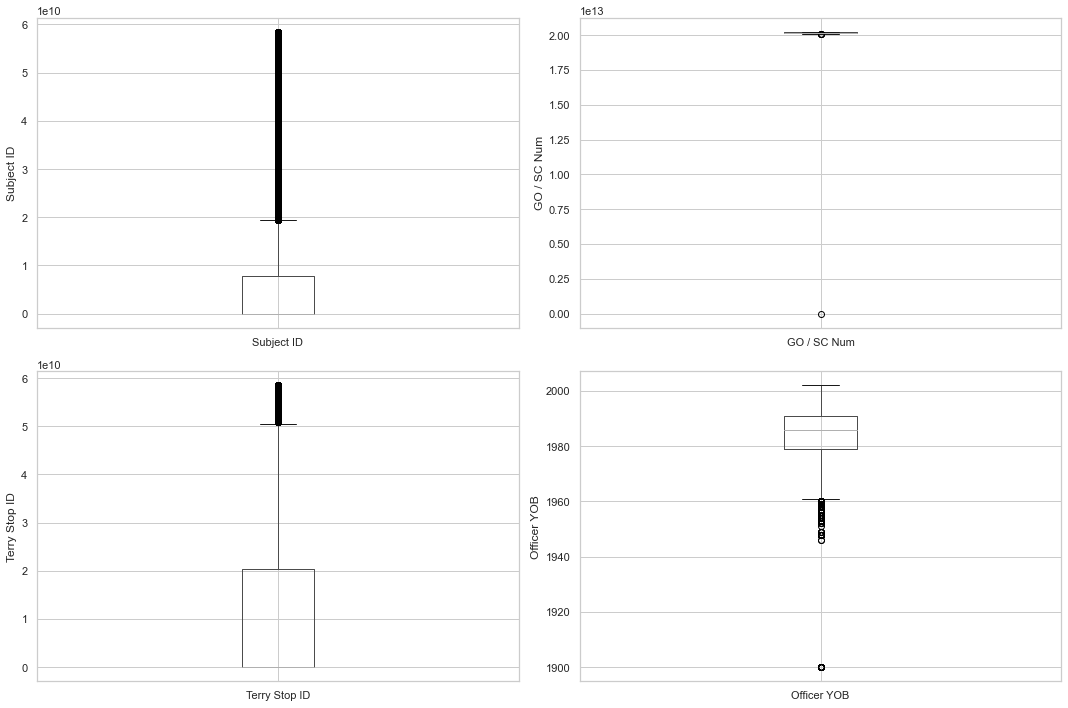

In [3597]:
def plot_boxplots(df, columns, figsize=(15, 10), rows=2, cols=2):
    
    plt.figure(figsize=figsize)
    
    for i, column in enumerate(columns, 1):
        plt.subplot(rows, cols, i)
        fig = df.boxplot(column=column)
        fig.set_title('')
        fig.set_ylabel(column)
    
    plt.tight_layout()
    plt.show()

# Usage
columns_to_plot = ['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer YOB']

plot_boxplots(df, columns_to_plot)

The above boxplots confirm that there are lot of outliers in these variables.

### Check the distribution of Numerical variables

Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range).

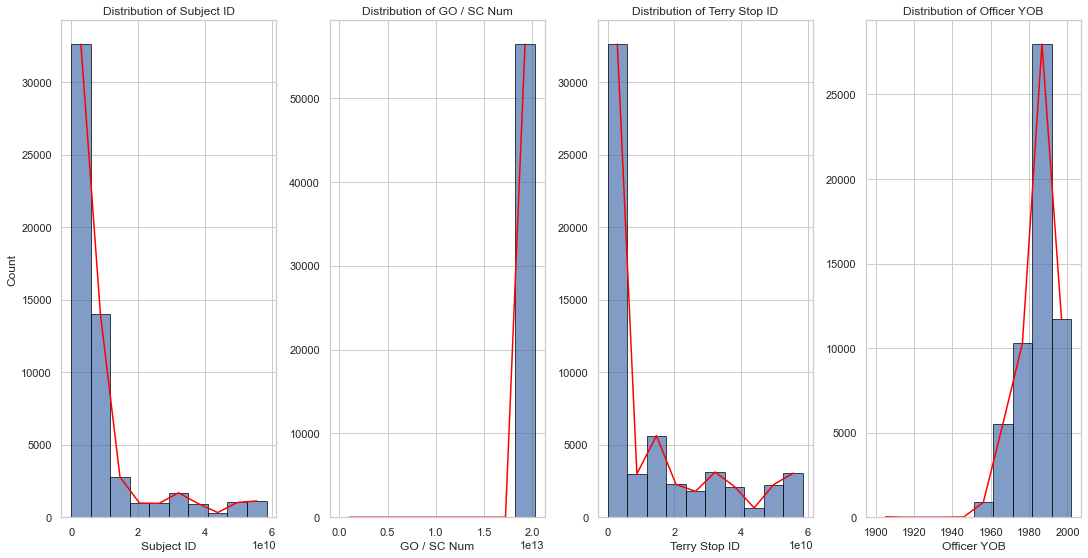

In [3598]:
def plot_histograms(df, columns=None, figsize=(19, 15), rows=2, cols=5, bins=10):
    
    plt.figure(figsize=figsize)
    
    for i, column in enumerate(columns, 1):
        plt.subplot(rows, cols, i)
        counts, bin_edges, _ = plt.hist(df[column], bins=bins, alpha=0.7, edgecolor='black')
        
        # Calculate the midpoints of each bin
        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
        
        # Plot the line graph on top of the histogram
        plt.plot(bin_centers, counts, '-', color='red')
        plt.xlabel(column)  
        if i % cols == 1:  # First column of each row
            plt.ylabel('Count')  
        plt.title(f'Distribution of {column}')
    
    plt.tight_layout()
    plt.show()

# Usage
columns_to_plot = ['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer YOB']

plot_histograms(df, columns=columns_to_plot)


Analysis:

- `Subject ID`: The distribution is highly right-skewed, with most values concentrated near zero, indicating potential outliers or missing values.

- `GO / SC Num`: The distribution is tightly clustered around a specific range, suggesting very little variation in the data.

- `Terry Stop ID`: The distribution is right-skewed with multiple peaks, indicating potential outliers and the presence of distinct clusters.

- `Officer YOB`: The distribution is concentrated around the 1980s-1990s, with a tail extending towards earlier years, possibly indicating data entry errors for older years.

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [3599]:
# find outliers for Subject ID variable

IQR = df["Subject ID"].quantile(0.75) - df["Subject ID"].quantile(0.25)
Lower_fence = df["Subject ID"].quantile(0.25) - (IQR * 3)
Upper_fence = df["Subject ID"].quantile(0.75) + (IQR * 3)
print('Subject ID outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Subject ID outliers are values < -23256809194.0 or > 31009078923.0


For `Subject ID`, the minimum and maximum values are -1.000000e+00 and 5.847921e+10. So, the outliers are values > 31009078923.0  

As you can see, It is skewed to the left. `Subject ID` has a -1 which is an indication that the values are missing which is at 57.8 % (32617). This will affect our mode and since Subject ID is a unique value for every subject, we are going to drop the column.

In [3600]:
# Dropping the Subject ID column
df.drop('Subject ID', axis=1, inplace=True)

In [3601]:
# find outliers for GO / SC Num variable

IQR = df["GO / SC Num"].quantile(0.75) - df["GO / SC Num"].quantile(0.25)
Lower_fence = df["GO / SC Num"].quantile(0.25) - (IQR * 3)
Upper_fence = df["GO / SC Num"].quantile(0.75) + (IQR * 3)
print('GO / SC Num outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

GO / SC Num outliers are values < 20049999937433.0 or > 20330000085609.0


For `Go / SC Num`, the minimum and maximum values are -1.000000e+00 and 2.024000e+13. So, the outliers are values > 20330000085609.0

In [3602]:
# Dropping the GO / SC Num column
df.drop('GO / SC Num', axis=1, inplace=True)

In [3603]:
# find outliers for Terry Stop ID variable

IQR = df["Terry Stop ID"].quantile(0.75) - df["Terry Stop ID"].quantile(0.25)
Lower_fence = df["Terry Stop ID"].quantile(0.25) - (IQR * 3)
Upper_fence = df["Terry Stop ID"].quantile(0.75) + (IQR * 3)
print('Terry Stop ID outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Terry Stop ID outliers are values < -60879357821.0 or > 81173034423.0


For `Terry Stop ID`, the minimum and maximum values are 4.257800e+04 and 5.849088e+10. So, the outliers are values > 81173034423.0

In [3604]:
# find outliers for Officer YOB variable

IQR = df["Officer YOB"].quantile(0.75) - df["Officer YOB"].quantile(0.25)
Lower_fence = df["Officer YOB"].quantile(0.25) - (IQR * 3)
Upper_fence = df["Officer YOB"].quantile(0.75) + (IQR * 3)
print('Officer YOB outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Officer YOB outliers are values < 1943.0 or > 2027.0


For `Officer YOB`, the minimum and maximum values are 1900.0  and 2002.0. So, the outliers are values > 2027.0

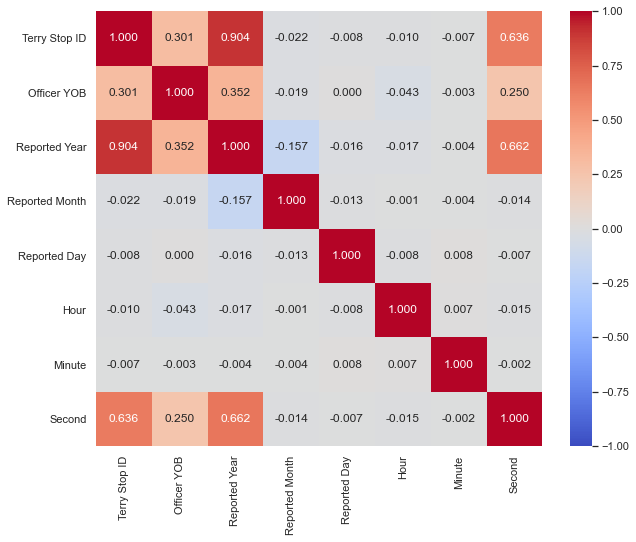

In [3605]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes("number").corr(), vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='coolwarm');

## **Feature Selection**

### *Declare feature vector and target variable*

In [3606]:
df.columns

Index(['Subject Age Group', 'Terry Stop ID', 'Stop Resolution', 'Officer ID',
       'Officer YOB', 'Officer Gender', 'Officer Race',
       'Subject Perceived Race', 'Subject Perceived Gender',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat',
       'Reported Year', 'Reported Month', 'Reported Day', 'Hour', 'Minute',
       'Second'],
      dtype='object')

In [3607]:
X = df.drop(['Arrest Flag'], axis=1)

y = df['Arrest Flag']

### ***Split data into separate training and test set***

In [3608]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [3609]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((39503, 23), (16930, 23))

## **Feature Engineering**

First, I will display the categorical and numerical variables again separately.

In [3610]:
# check data types in X_train

X_train.dtypes

Subject Age Group           object
Terry Stop ID                int64
Stop Resolution             object
Officer ID                  object
Officer YOB                  int64
Officer Gender              object
Officer Race                object
Subject Perceived Race      object
Subject Perceived Gender    object
Initial Call Type           object
Final Call Type             object
Call Type                   object
Officer Squad               object
Frisk Flag                  object
Precinct                    object
Sector                      object
Beat                        object
Reported Year                int32
Reported Month               int32
Reported Day                 int32
Hour                         int32
Minute                       int32
Second                       int32
dtype: object

In [3611]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Subject Age Group',
 'Stop Resolution',
 'Officer ID',
 'Officer Gender',
 'Officer Race',
 'Subject Perceived Race',
 'Subject Perceived Gender',
 'Initial Call Type',
 'Final Call Type',
 'Call Type',
 'Officer Squad',
 'Frisk Flag',
 'Precinct',
 'Sector',
 'Beat']

In [3612]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Terry Stop ID',
 'Officer YOB',
 'Reported Year',
 'Reported Month',
 'Reported Day',
 'Hour',
 'Minute',
 'Second']

### *Engineering Missing Values in Numerical Variables*

In [3613]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

Terry Stop ID     0
Officer YOB       0
Reported Year     0
Reported Month    0
Reported Day      0
Hour              0
Minute            0
Second            0
dtype: int64

In [3614]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [3615]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

Terry Stop ID     0
Officer YOB       0
Reported Year     0
Reported Month    0
Reported Day      0
Hour              0
Minute            0
Second            0
dtype: int64

In [3616]:
X_train.mode()

,Subject Age Group,Terry Stop ID,Stop Resolution,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,...,Frisk Flag,Precinct,Sector,Beat,Reported Year,Reported Month,Reported Day,Hour,Minute,Second
0,26 - 35,32633045284,Field Contact,7456,1986.0,M,White,White,Male,Unknown,...,N,West,Unknown,Unknown,2018.0,5.0,2.0,18.0,0.0,0.0
1,NaN,36537398464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### *Engineering missing values in categorical variables*

In [3617]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Subject Age Group           0.0
Stop Resolution             0.0
Officer ID                  0.0
Officer Gender              0.0
Officer Race                0.0
Subject Perceived Race      0.0
Subject Perceived Gender    0.0
Initial Call Type           0.0
Final Call Type             0.0
Call Type                   0.0
Officer Squad               0.0
Frisk Flag                  0.0
Precinct                    0.0
Sector                      0.0
Beat                        0.0
dtype: float64

In [3618]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Subject Age Group           0
Stop Resolution             0
Officer ID                  0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [3619]:
# check missing values in X_train

X_train.isnull().sum()

Subject Age Group           0
Terry Stop ID               0
Stop Resolution             0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
Reported Year               0
Reported Month              0
Reported Day                0
Hour                        0
Minute                      0
Second                      0
dtype: int64

In [3620]:
# check missing values in X_test

X_test.isnull().sum()

Subject Age Group           0
Terry Stop ID               0
Stop Resolution             0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
Reported Year               0
Reported Month              0
Reported Day                0
Hour                        0
Minute                      0
Second                      0
dtype: int64

### *Encode categorical variables*

In [3621]:
categorical

['Subject Age Group',
 'Stop Resolution',
 'Officer ID',
 'Officer Gender',
 'Officer Race',
 'Subject Perceived Race',
 'Subject Perceived Gender',
 'Initial Call Type',
 'Final Call Type',
 'Call Type',
 'Officer Squad',
 'Frisk Flag',
 'Precinct',
 'Sector',
 'Beat']

In [3622]:
X_train[categorical].head()

,Subject Age Group,Stop Resolution,Officer ID,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Call Type,Officer Squad,Frisk Flag,Precinct,Sector,Beat
28412,36 - 45,Field Contact,8936,F,White,White,Male,NOISE - GENERAL,--DISTURBANCE - OTHER,"TELEPHONE OTHER, NOT 911",EAST PCT 3RD W - EDWARD,N,East,E,E1
8412,26 - 35,Offense Report,7515,M,White,Black or African American,Male,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,ONVIEW,WEST PCT 2ND W - DAVID BEATS,N,West,M,M3
50119,26 - 35,Arrest,6942,M,White,White,Male,DISTURBANCE,--WARRANT SERVICES - FELONY,ONVIEW,WEST PCT 3RD W - DAVID BEATS,Y,West,D,D2
35192,18 - 25,Field Contact,8679,M,Black or African American,White,Female,OBS - FIGHT - IP - PHYSICAL (NO WEAPONS),--DISTURBANCE - OTHER,911,TRAINING - FIELD TRAINING SQUAD,N,East,E,E3
51273,18 - 25,Field Contact,6086,M,White,Multi-Racial,Male,Unknown,Unknown,Unknown,NORTH PCT 1ST W - B/N RELIEF (JOHN),N,West,M,M2


In [3623]:
import category_encoders as ce

# List all the columns you want to encode
columns_to_encode = ['Officer Gender', 'Subject Perceived Gender', 'Frisk Flag']

# Create the binary encoder
binary_encoder = ce.BinaryEncoder(cols=columns_to_encode)

# Fit and transform the training data
X_train = binary_encoder.fit_transform(X_train)

# Transform the test data
X_test = binary_encoder.transform(X_test)

In [3624]:
X_train.head()

,Subject Age Group,Terry Stop ID,Stop Resolution,Officer ID,Officer YOB,Officer Gender_0,Officer Gender_1,Officer Race,Subject Perceived Race,Subject Perceived Gender_0,...,Frisk Flag_1,Precinct,Sector,Beat,Reported Year,Reported Month,Reported Day,Hour,Minute,Second
28412,36 - 45,55352527254,Field Contact,8936,1987,0,1,White,White,0,...,1,East,E,E1,2024,4,11,1,31,30
8412,26 - 35,402224,Offense Report,7515,1984,1,0,White,Black or African American,0,...,1,West,M,M3,2018,3,25,14,51,0
50119,26 - 35,504011,Arrest,6942,1984,1,0,White,White,0,...,0,West,D,D2,2018,11,19,3,1,0
35192,18 - 25,11142663489,Field Contact,8679,1987,1,0,Black or African American,White,0,...,1,East,E,E3,2019,10,17,18,31,6
51273,18 - 25,502186,Field Contact,6086,1959,1,0,White,Multi-Racial,0,...,1,West,M,M2,2018,11,12,11,6,0


In [3625]:
X_train.isnull().sum()

Subject Age Group             0
Terry Stop ID                 0
Stop Resolution               0
Officer ID                    0
Officer YOB                   0
Officer Gender_0              0
Officer Gender_1              0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender_0    0
Subject Perceived Gender_1    0
Subject Perceived Gender_2    0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad                 0
Frisk Flag_0                  0
Frisk Flag_1                  0
Precinct                      0
Sector                        0
Beat                          0
Reported Year                 0
Reported Month                0
Reported Day                  0
Hour                          0
Minute                        0
Second                        0
dtype: int64

We can See that we have two additional values for `Officer Gender` as Officer Gender_0 and Officer Gender_1, `Subject Perceived Gender` as Subject Perceived Gender_0, Subject Perceived Gender_1 and Subject Perceived Gender_2 and `Frisk Flag` as Frisk Flag_0 and Frisk Flag_1.

Now, I will create the X_train training set.

In [3626]:
# using ohe Recommended 

ohe = ce.OneHotEncoder(cols=["Subject Age Group", "Stop Resolution", "Officer ID",
                             "Officer Race", "Subject Perceived Race", 
                             "Initial Call Type", "Final Call Type", "Call Type", "Officer Squad",
                             "Precinct", "Sector", "Beat"] ,handle_missing="value", handle_unknown="ignore")

ohe.fit(X_train)

X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

X_train.head()

MemoryError: Unable to allocate 399. MiB for an array with shape (39503, 1323) and data type int64

Similarly, I will create the X_test testing set.

In [ ]:
X_test.head()

,Subject Age Group_1,Subject Age Group_2,Subject Age Group_3,Subject Age Group_4,Subject Age Group_5,Subject Age Group_6,Terry Stop ID,Stop Resolution_1,Stop Resolution_2,Stop Resolution_3,...,Beat_51,Beat_52,Beat_53,Beat_54,Reported Year,Reported Month,Reported Day,Hour,Minute,Second
48798,1,0,0,0,0,0,234815,0,1,0,...,0.0,0.0,0.0,0.0,2017,2,1,16,49,0
37868,0,0,0,0,1,0,13267645685,0,0,1,...,0.0,0.0,0.0,0.0,2020,5,29,7,34,53
56308,0,0,1,0,0,0,12664223339,1,0,0,...,0.0,0.0,0.0,0.0,2020,2,29,2,31,58
37616,0,1,0,0,0,0,50095664771,1,0,0,...,0.0,0.0,0.0,0.0,2023,5,27,16,20,52
813,0,1,0,0,0,0,502199,1,0,0,...,0.0,0.0,0.0,0.0,2018,11,13,6,55,0


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. 

I will do it as follows.

## **Feature Scaling**

In [3469]:
X_train.describe()

MemoryError: Unable to allocate 619. MiB for an array with shape (2053, 39503) and data type int64

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
    )

In [ ]:
X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
    )

In [ ]:
X_train.isnull().sum().sum()

0

We now have X_train dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

In [ ]:
X_train.describe()

,Subject Age Group_1,Subject Age Group_2,Subject Age Group_3,Subject Age Group_4,Subject Age Group_5,Subject Age Group_6,Terry Stop ID,Stop Resolution_1,Stop Resolution_2,Stop Resolution_3,...,Beat_51,Beat_52,Beat_53,Beat_54,Reported Year,Reported Month,Reported Day,Hour,Minute,Second
count,39503.000000,39503.000000,39503.000000,39503.000000,39503.000000,39503.000000,39503.000000,39503.000000,39503.000000,39503.000000,...,39503.000000,39503.000000,39503.000000,39503.000000,39503.000000,39503.000000,39503.000000,39503.000000,39503.000000,39503.000000
mean,0.231906,0.344835,0.196441,0.132775,0.054882,0.039162,0.207659,0.470091,0.264081,0.249930,...,0.010809,0.012126,0.001949,0.000734,0.410880,0.495219,0.489619,0.510249,0.497086,0.211184
std,0.422055,0.475320,0.397311,0.339335,0.227752,0.193982,0.302168,0.499111,0.440848,0.432978,...,0.103406,0.109448,0.044107,0.027085,0.288521,0.304032,0.295665,0.313940,0.294506,0.312552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.222222,0.272727,0.233333,0.217391,0.237288,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.454545,0.500000,0.565217,0.491525,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.345215,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.666667,0.727273,0.733333,0.782609,0.745763,0.406780
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Model Training**

In [ ]:
X_train.isnull().sum()

Subject Age Group_1    0
Subject Age Group_2    0
Subject Age Group_3    0
Subject Age Group_4    0
Subject Age Group_5    0
                      ..
Reported Month         0
Reported Day           0
Hour                   0
Minute                 0
Second                 0
Length: 2059, dtype: int64

In [ ]:
X_test.isnull().sum()

Subject Age Group_1    0
Subject Age Group_2    0
Subject Age Group_3    0
Subject Age Group_4    0
Subject Age Group_5    0
                      ..
Reported Month         0
Reported Day           0
Hour                   0
Minute                 0
Second                 0
Length: 2059, dtype: int64

In [ ]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

### *Predict Results*

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_pred_test = logreg.predict(X_test)

log_f1 = f1_score(y_test, y_pred_test)
log_recall = recall_score(y_test, y_pred_test)
log_auc = roc_auc_score(y_test, y_pred_test)
log_accuracy = accuracy_score(y_test, y_pred_test)

print("f1-score = ", log_f1)
print("recall score = ", log_recall)
print("ROC-AUC score = ", log_auc)
print("Model Accuracy = ", log_accuracy)

f1-score =  0.9874999999999999
recall score =  0.97675568743818
ROC-AUC score =  0.9882856721570893
Model Accuracy =  0.9972671622212506


Here, **y_test** are the true class labels and **y_pred_test** are the predicted class labels in the test-set.

### *Compare the train-set and test-set accuracy*


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = logreg.predict(X_train)

f1 = f1_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
auc = roc_auc_score(y_train, y_pred_train)
accuracy = accuracy_score(y_train, y_pred_train)

print("f1-score Train = ", f1)
print("recall score Train = ", log_recall)
print("ROC-AUC score Train = ", auc)
print("Model Accuracy Train = ", accuracy)

f1-score Train =  0.9853170189098999
recall score Train =  0.97675568743818
ROC-AUC score Train =  0.9861840198809831
Model Accuracy Train =  0.996907796101949


## *Check for overfitting and underfitting*

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9969
Test set score: 0.9973


In [ ]:
# Load the saved model
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Load the test data
test_data = pd.read_csv('test_data.csv')

# Separate features from target (if target is in the CSV)
if 'target' in test_data.columns:
    X_test = test_data.drop('target', axis=1)
else:
    X_test = test_data

# Make predictions
y_pred = loaded_model.predict(X_test)

# Add predictions to the test data
test_data['predicted'] = y_pred

# Save the results to a new CSV file
test_data.to_csv('test_data_with_predictions.csv', index=False)

print("Predictions saved to 'test_data_with_predictions.csv'")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Beat
- Call Type
- Final Call Type
- Frisk Flag
- GO / SC Num
- ...
Feature names seen at fit time, yet now missing:
- Frisk Flag_Y
- Frisk Flag_nan
- Hour
- Minute
- Officer Gender_M
- ...


c:\Users\Brian\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Predictions saved to 'test_data_with_predictions.csv'


## *Compare model accuracy with null accuracy*

In [ ]:
# check class distribution in test set

y_test.value_counts()

Arrest Flag_Y
0.0    16274
1.0     2022
Name: count, dtype: int64

We can see that the occurences of most frequent class is 16274. So, we can calculate null accuracy by dividing 16274 by total number of occurences.

In [ ]:
# check null accuracy score

null_accuracy = (16274/(16274 + 2022))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8895


## *Confusion matrix*

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[16271     3]
 [   47  1975]]

True Positives(TP) =  16271

True Negatives(TN) =  1975

False Positives(FP) =  3

False Negatives(FN) =  47


The confusion matrix shows `16270 + 1980 = 18250 correct predictions` and `4 + 42 = 46 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 16270


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 1980


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 4 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 42 `(Type II error)`

<Axes: >

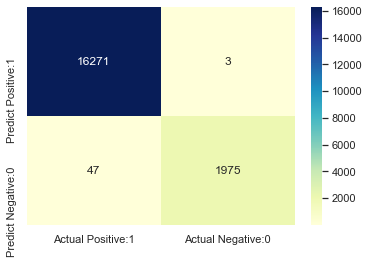

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## *Classification Metrices*

In [ ]:
print("logistic Model Test Set", classification_report(y_test, y_pred_test))
print("logistic Model Train Set", classification_report(y_train, y_pred_train))

logistic Model Test Set               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16274
         1.0       1.00      0.98      0.99      2022

    accuracy                           1.00     18296
   macro avg       1.00      0.99      0.99     18296
weighted avg       1.00      1.00      1.00     18296

logistic Model Train Set               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38134
         1.0       1.00      0.97      0.99      4554

    accuracy                           1.00     42688
   macro avg       1.00      0.99      0.99     42688
weighted avg       1.00      1.00      1.00     42688



logistic_model ROC_AUC Score: 0.9999573330454833
--------------------------------------------------


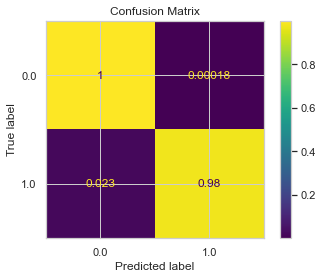

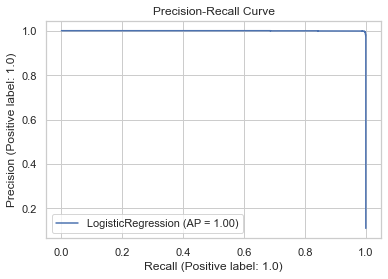

In [ ]:
# ROC-AUC Score
y_pred_proba = logreg.predict_proba(X_test)
print('logistic_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_proba[:, 1]))
print('--------------------------------------------------')

# Confusion Matrix
log_matrix = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, normalize='true')
plt.title("Confusion Matrix")
plt.show()

# Precision-Recall Curve
log_prCurve = PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show();

## *Model Validation*

In [ ]:
cv = StratifiedKFold(n_splits=10) # for unbalanced data validation
scores = cross_validate(logreg, X_train, y_train, 
                        scoring=['accuracy', 'precision', 'recall', 'f1'], 
                        cv=cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.996580
train_accuracy     0.996791
test_precision     0.997974
train_precision    0.998121
test_recall        0.969914
train_recall       0.971746
test_f1            0.983728
train_f1           0.984757
dtype: float64

## *ROC Curve and AUC*
  
Evaluating the model using ROC curve and calculate the Area Under the Curve (AUC)

In [ ]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

TypeError: 'numpy.float64' object is not callable

# **Decision Tree**

Train the classifier and make predictions

In [ ]:
# Train a DT classifier
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
# Make predictions for test data
y_pred = clf.predict(X_test)

## *Check Predictive Performance*

Used different evaluation measures to check the predictive performance of the classifier: 

In [ ]:
# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :0.999945343244425

AUC is :1.0

Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,16274,0,16274
1.0,1,2021,2022
All,16275,2021,18296


## *Confusion Matrix*

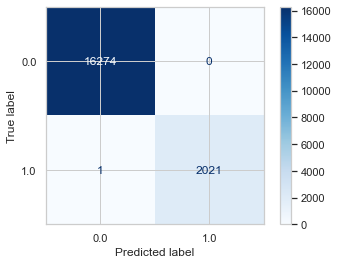

In [ ]:
# Alternative confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues);